In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Superstore.csv', encoding='latin1')

In [3]:
df.shape

(9994, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,9/11/2013,12/11/2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,9/11/2013,12/11/2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11/10/2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11/10/2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
df.isnull().sum().sum()

np.int64(0)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [11]:
df.drop(['Row ID'], axis=1, inplace=True)

**Separate numeric and categorical feature**

In [17]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name']
Numerical Features: ['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']


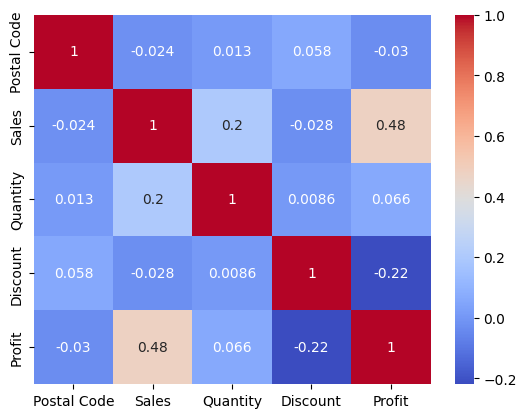

In [18]:
sns.heatmap(df[numerical_features].corr(), annot=True, cmap="coolwarm")
plt.show()

In [19]:
# here it shows that sales and profit are highly correlated
# discount does not have any correlation with sales and profit

In [20]:
# df.drop(['Discount', 'Postal Code'], axis=1, inplace=True)

# **Categorical Feature**

In [21]:
print(categorical_features)

['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name']


In [22]:
df['Order ID'].unique()

array(['CA-2013-152156', 'CA-2013-138688', 'US-2012-108966', ...,
       'CA-2011-110422', 'CA-2014-121258', 'CA-2014-119914'], dtype=object)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\2666757623.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


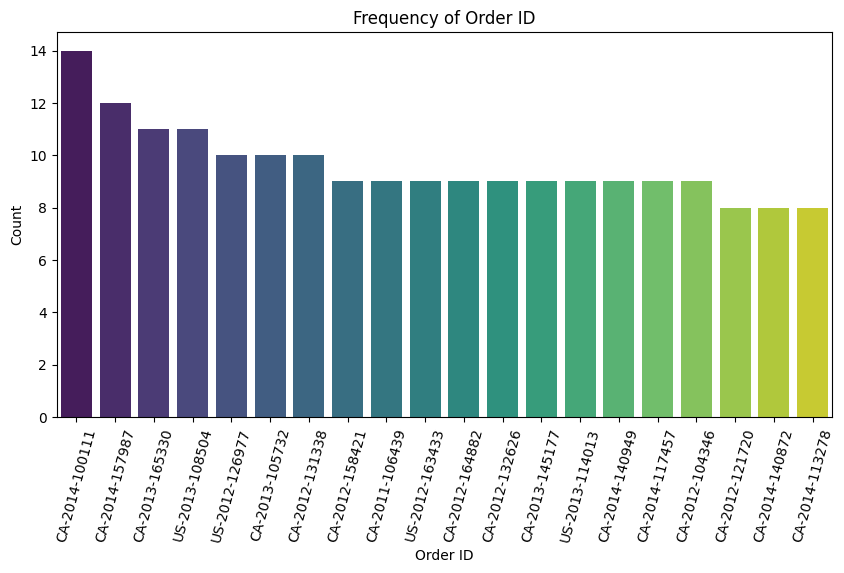

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\2666757623.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


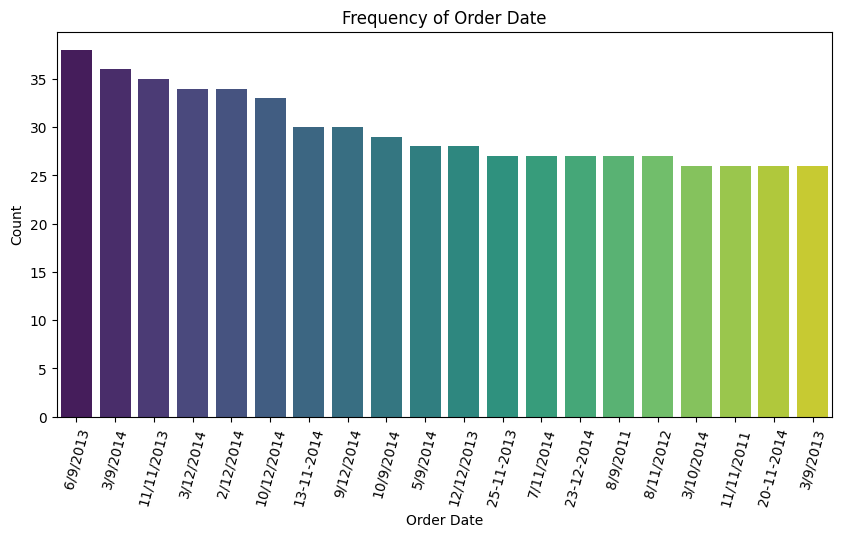

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\2666757623.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


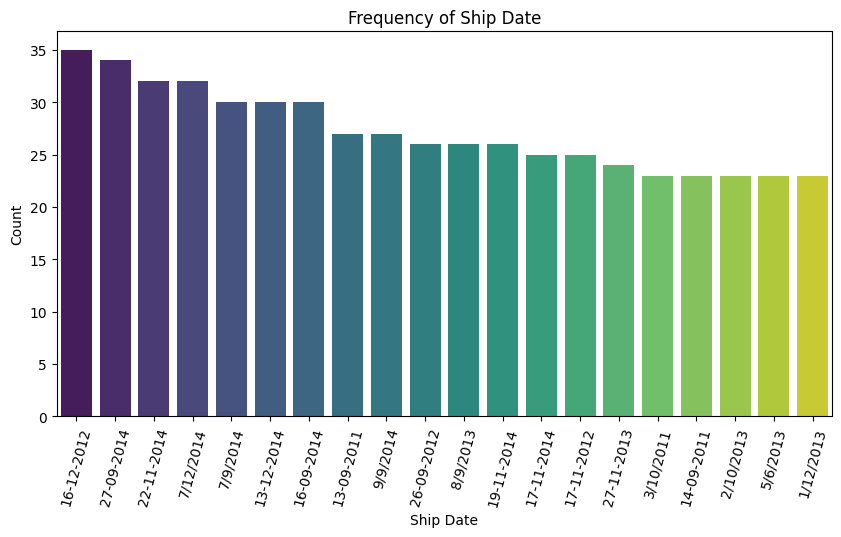

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\2666757623.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


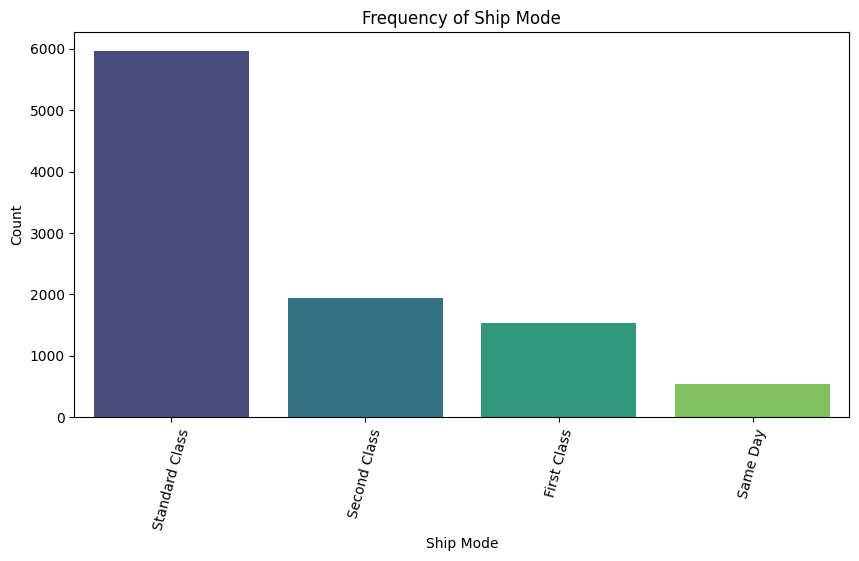

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\2666757623.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


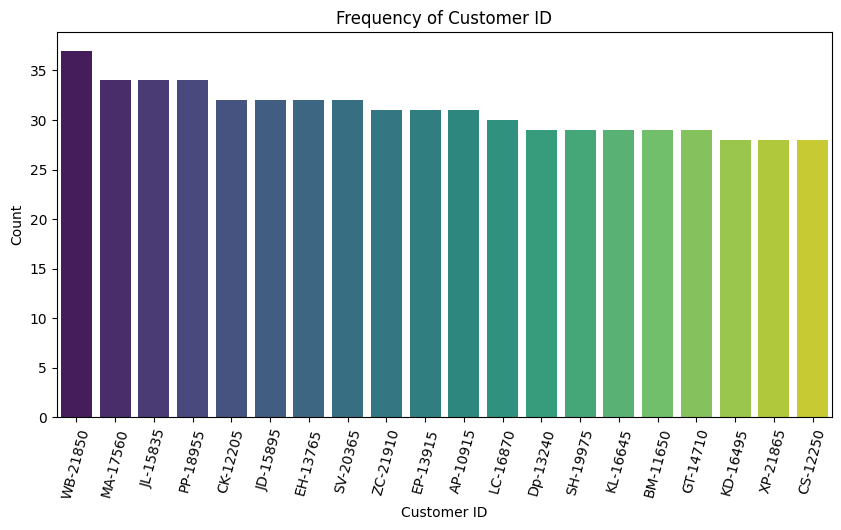

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\2666757623.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


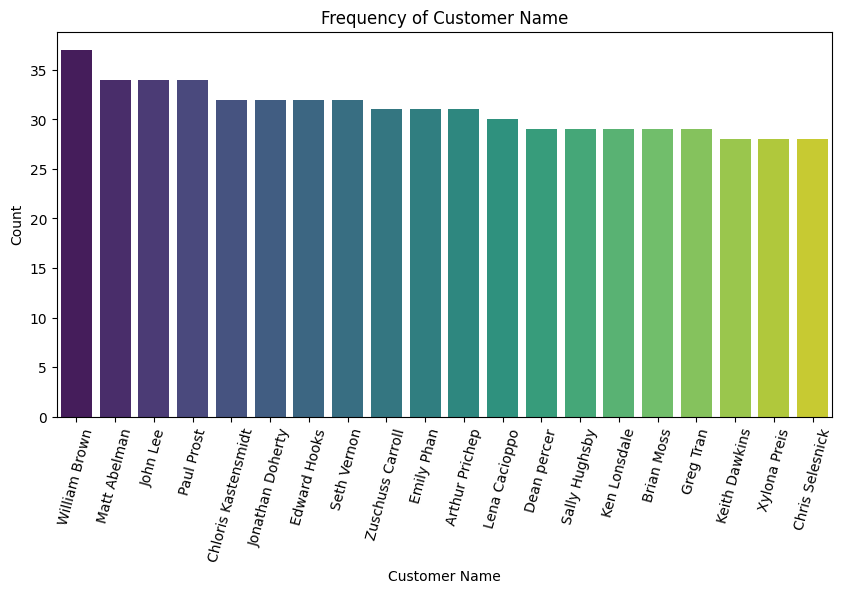

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\2666757623.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


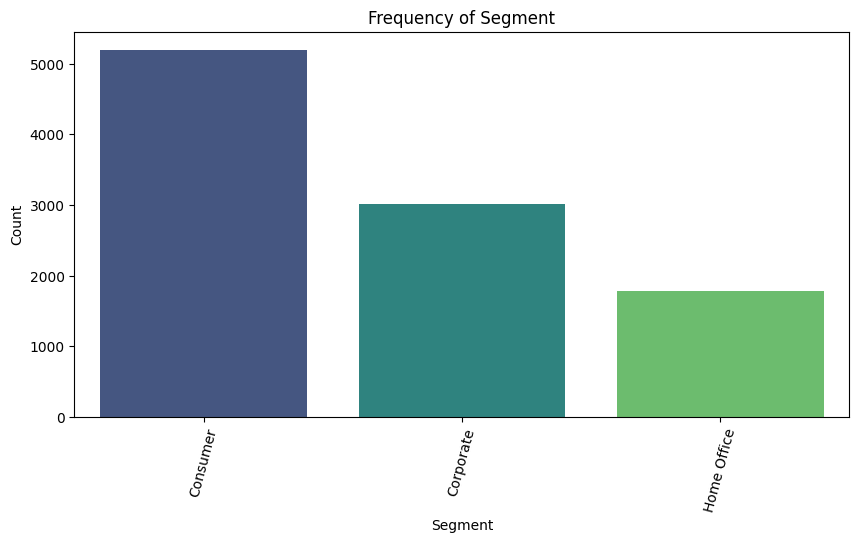

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\2666757623.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


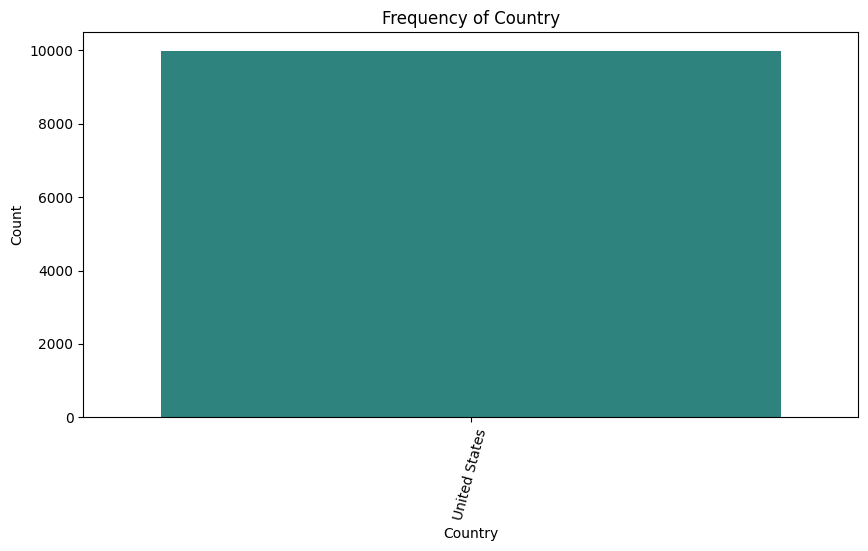

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\2666757623.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


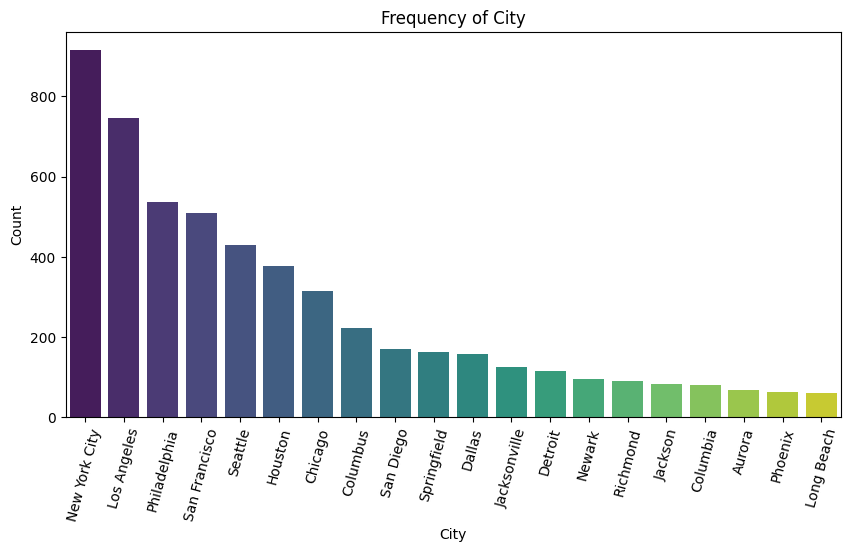

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\2666757623.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


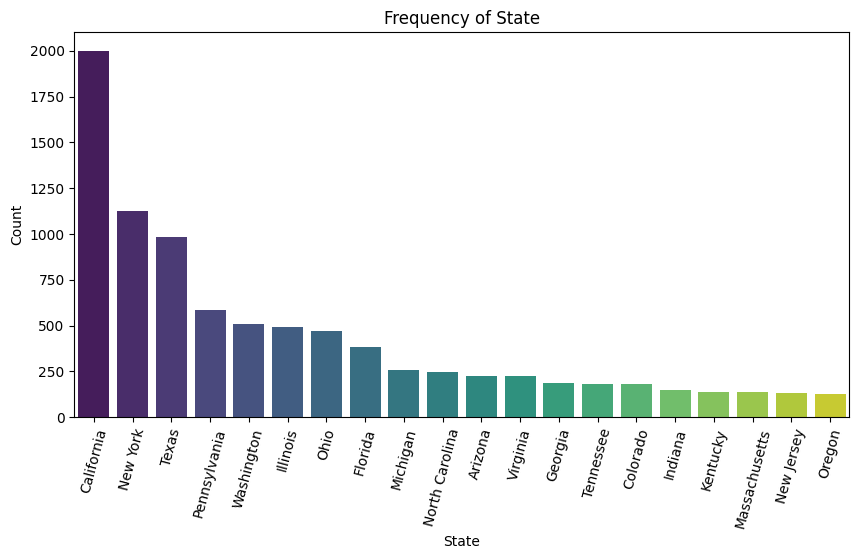

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\2666757623.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


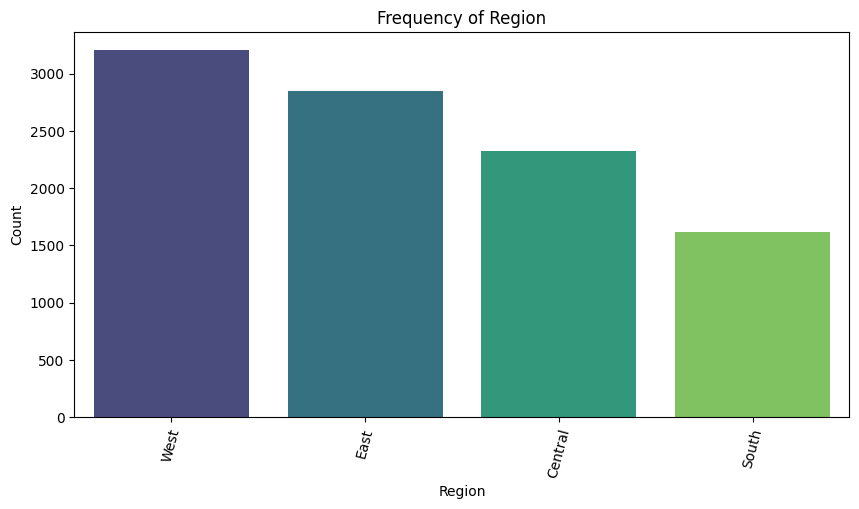

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\2666757623.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


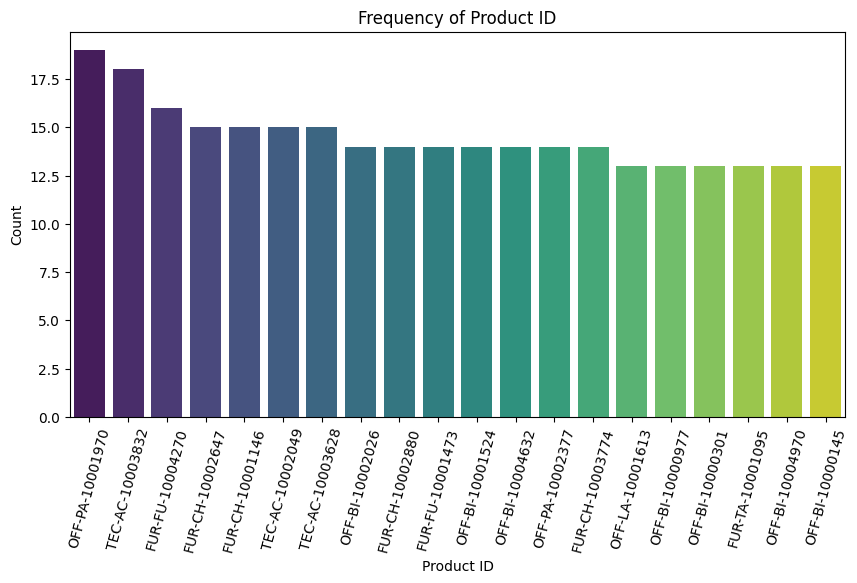

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\2666757623.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


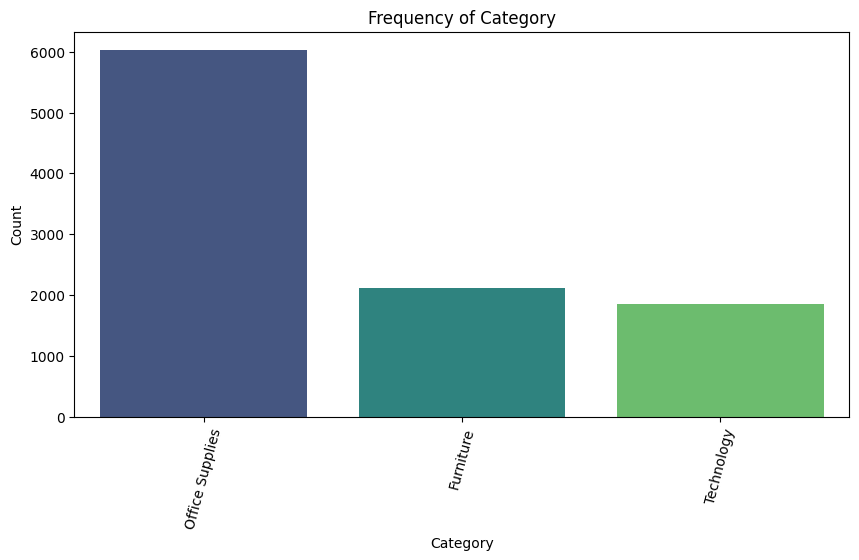

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\2666757623.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


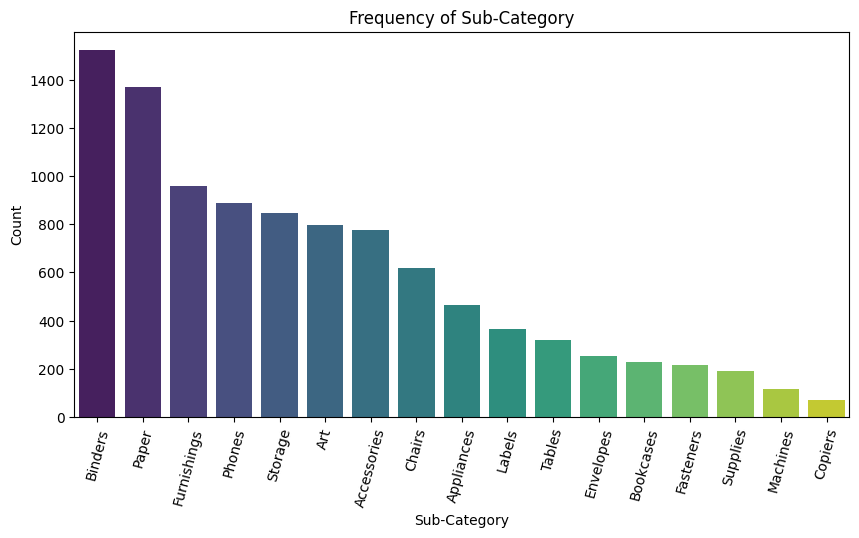

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\2666757623.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


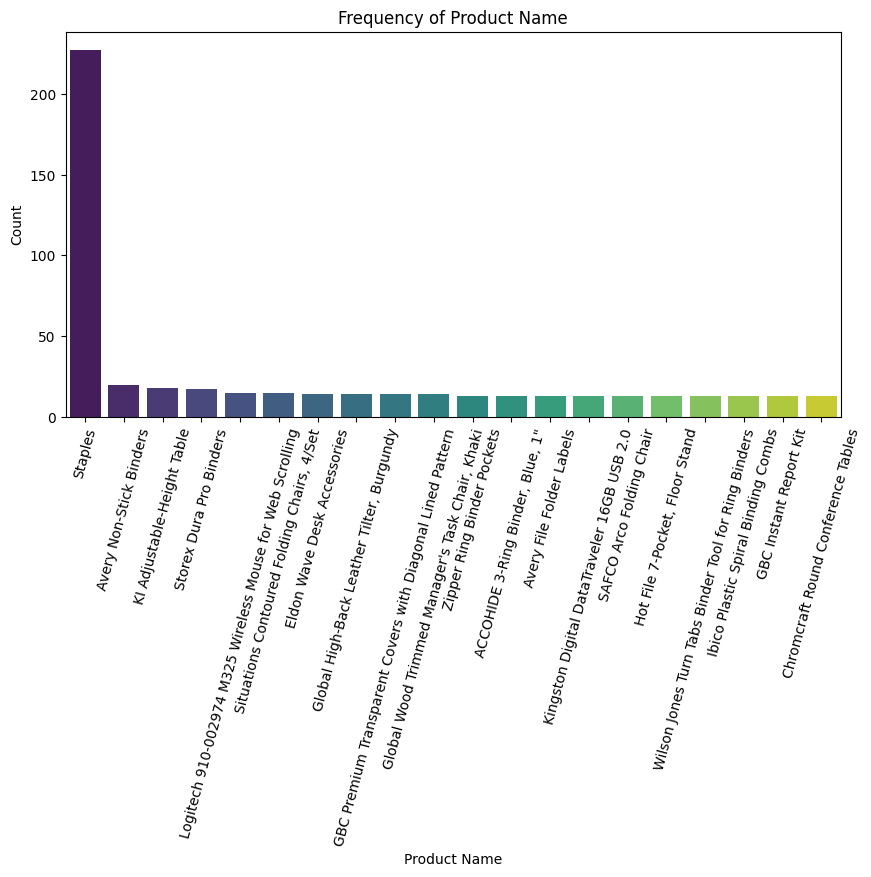

In [23]:
for col in categorical_features:
    plt.figure(figsize=(10,5))
    value_counts = df[col].value_counts().head(20)  # top 20 for readability
    sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")
    plt.title(f"Frequency of {col}")
    plt.xticks(rotation=75)
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.show()

**Convert Dates & Extract Time Features**

In [24]:
# Convert Order Date to datetime with dayfirst=True
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors="coerce")

# Also convert Ship Date if needed
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True, errors="coerce")

# Extract Year and Month
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.to_period('M')


**Sales trend by year**

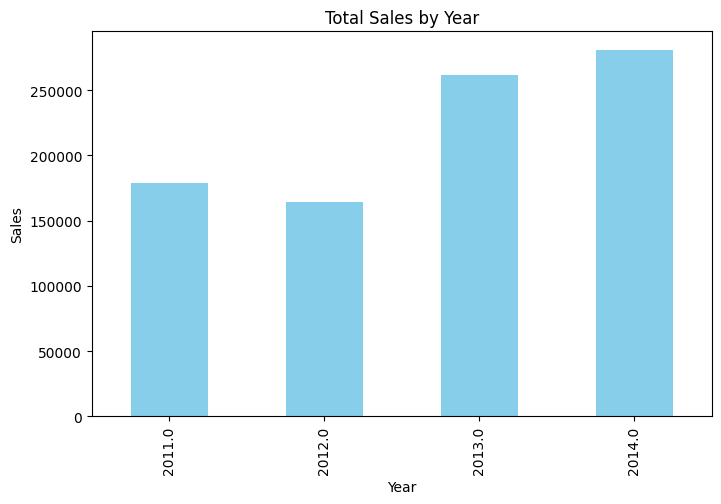

In [25]:
# import matplotlib.pyplot as plt

sales_by_year = df.groupby("Year")["Sales"].sum()

plt.figure(figsize=(8,5))
sales_by_year.plot(kind="bar", color="skyblue")
plt.title("Total Sales by Year")
plt.ylabel("Sales")
plt.show()


**Sales Trend by Month (Across All Years)**

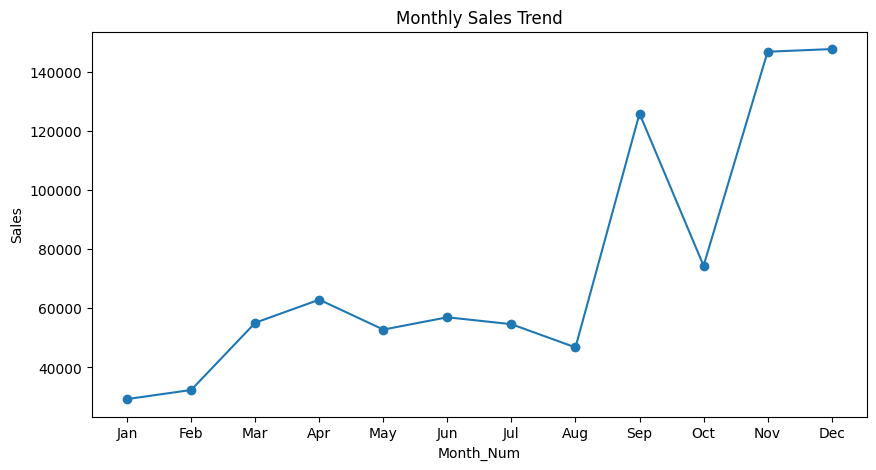

In [26]:
# Extract month number & name
df['Month_Num'] = df['Order Date'].dt.month
df['Month_Name'] = df['Order Date'].dt.strftime("%b")

sales_by_month = df.groupby("Month_Num")["Sales"].sum()

plt.figure(figsize=(10,5))
sales_by_month.plot(kind="line", marker="o")
plt.xticks(range(1,13),
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.show()


**Monthly Trend by Region (More Detailed)**




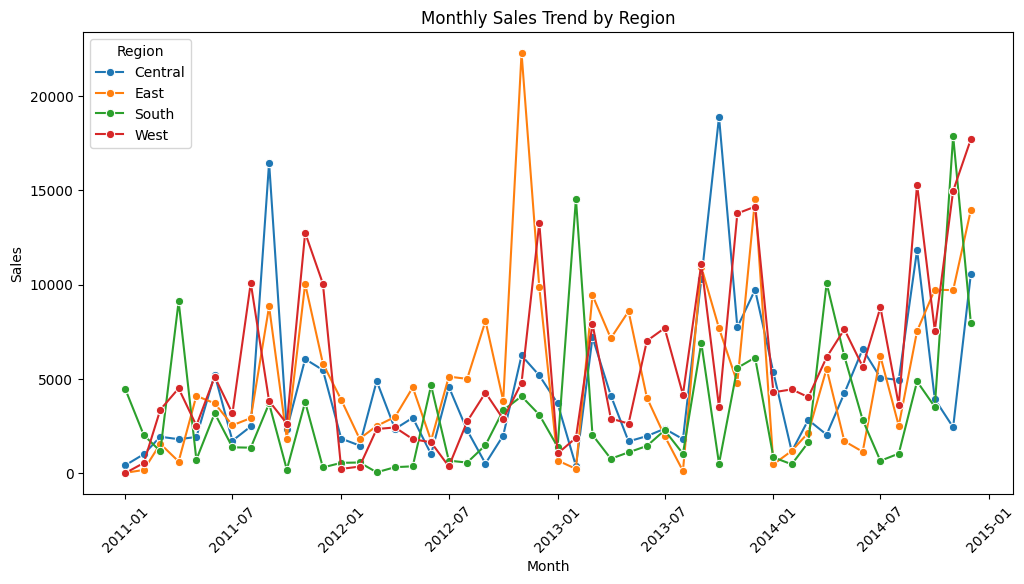

In [27]:

df['Month'] = df['Order Date'].dt.to_period('M').dt.to_timestamp()

# Group sales by Month & Region
monthly_region_sales = df.groupby(["Month","Region"])["Sales"].sum().reset_index()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_region_sales, x="Month", y="Sales", hue="Region", marker="o")
plt.title("Monthly Sales Trend by Region")
plt.xticks(rotation=45)
plt.ylabel("Sales")
plt.show()

**Sales Trend by Region**

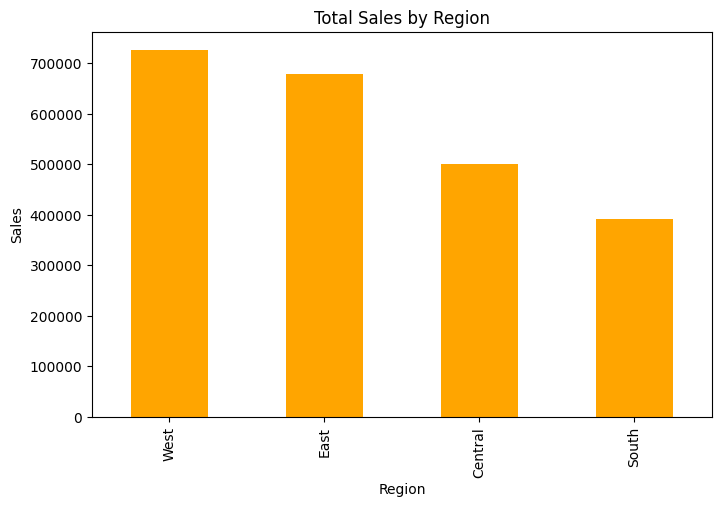

In [28]:
sales_by_region = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sales_by_region.plot(kind="bar", color="orange")
plt.title("Total Sales by Region")
plt.ylabel("Sales")
plt.show()


**Profitability by Category**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\1686154486.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_by_category.index, y=profit_by_category.values, palette="viridis")


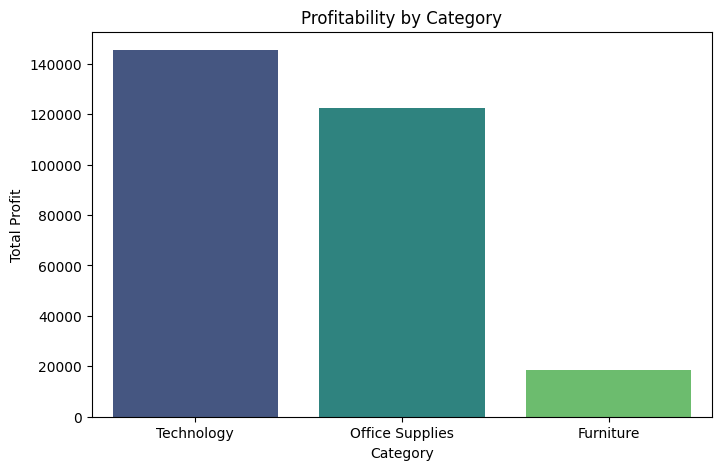

In [29]:


profit_by_category = df.groupby("Category")["Profit"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=profit_by_category.index, y=profit_by_category.values, palette="viridis")
plt.title("Profitability by Category")
plt.ylabel("Total Profit")
plt.show()


**Profitability by Sub-Category**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\3455626603.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_by_subcat.index, y=profit_by_subcat.values, palette="coolwarm")


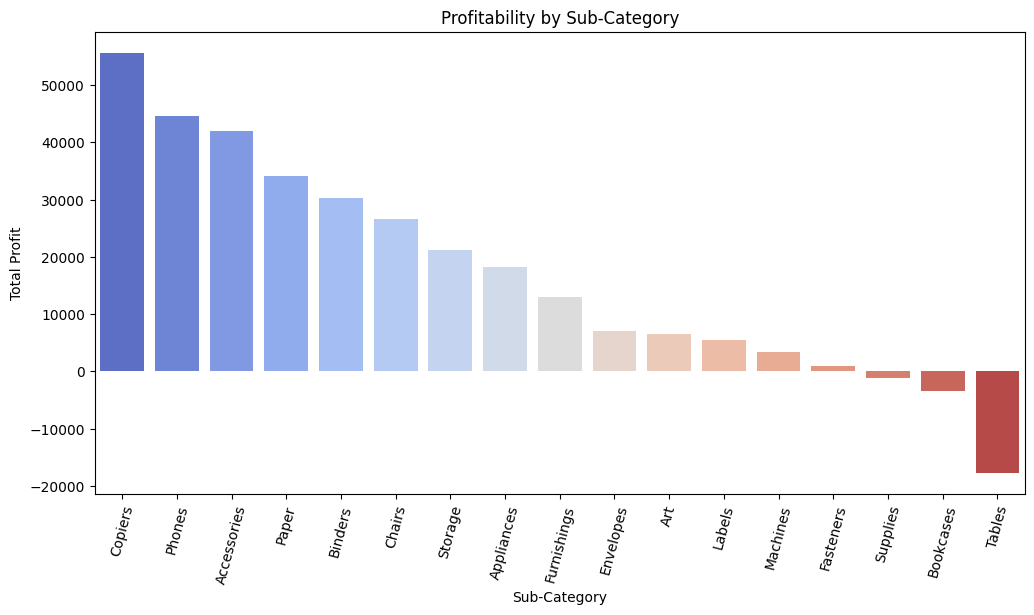

In [30]:
profit_by_subcat = df.groupby("Sub-Category")["Profit"].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=profit_by_subcat.index, y=profit_by_subcat.values, palette="coolwarm")
plt.title("Profitability by Sub-Category")
plt.ylabel("Total Profit")
plt.xticks(rotation=75)
plt.show()


**Profitability by Region**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\2535258.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_by_region.index, y=profit_by_region.values, palette="magma")


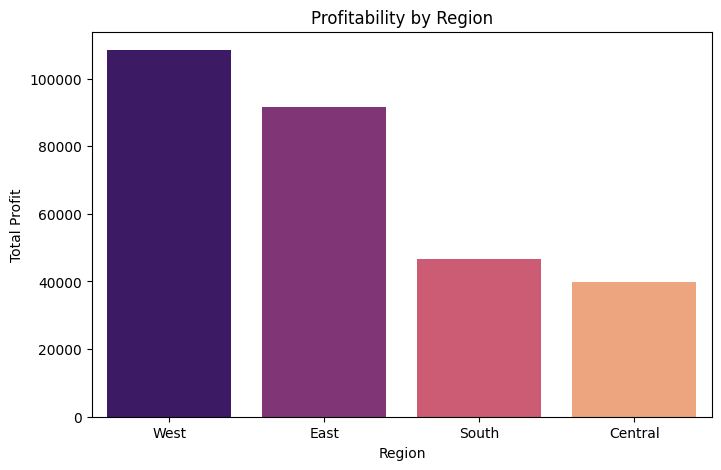

In [31]:
profit_by_region = df.groupby("Region")["Profit"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=profit_by_region.index, y=profit_by_region.values, palette="magma")
plt.title("Profitability by Region")
plt.ylabel("Total Profit")
plt.show()


**Profitability by Product**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\2056476467.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="Greens")


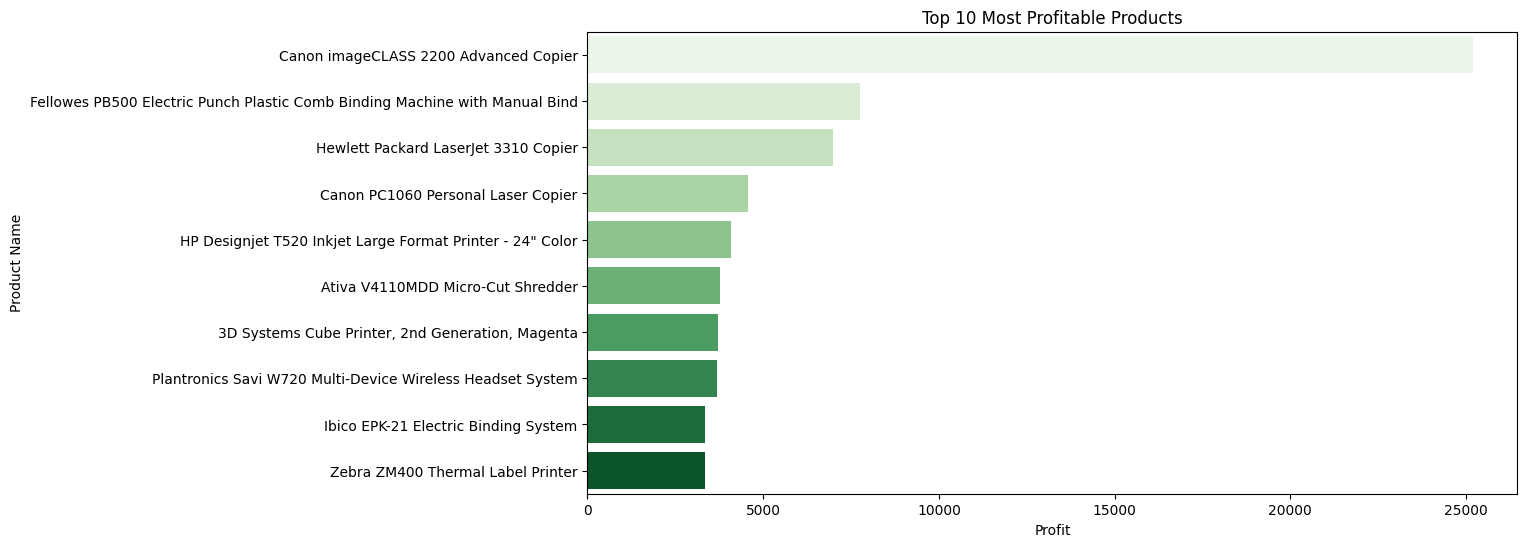

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\2056476467.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_products.values, y=bottom_products.index, palette="Reds")


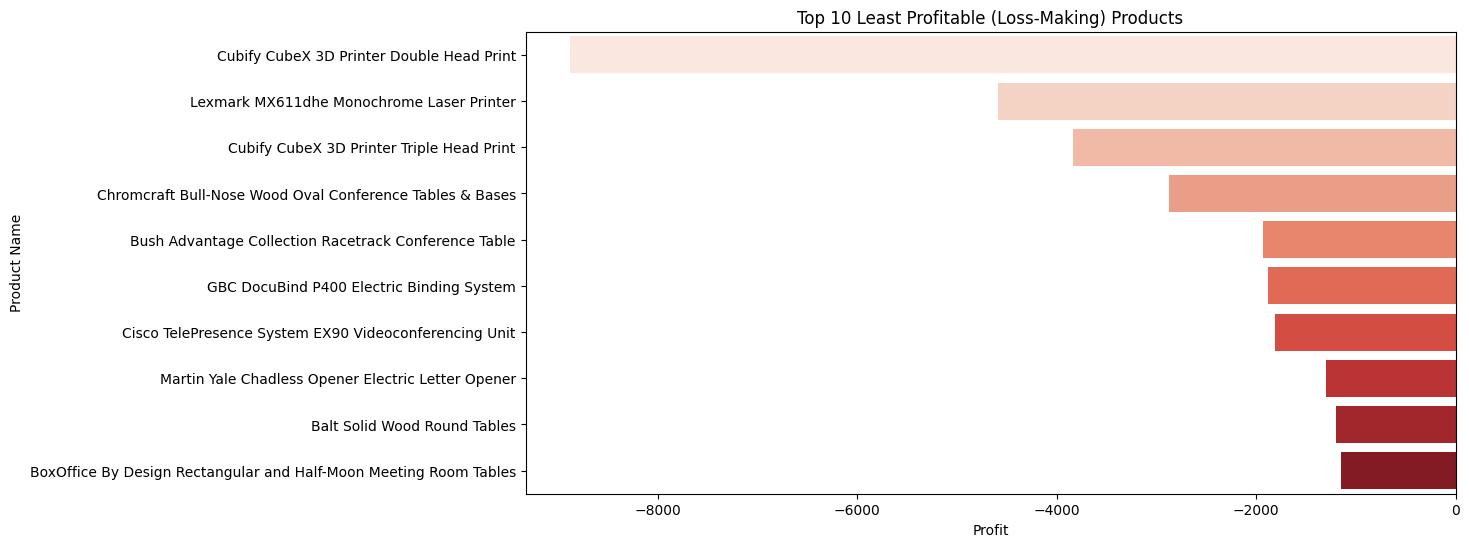

In [32]:
# Top 10 profitable products
top_products = df.groupby("Product Name")["Profit"].sum().sort_values(ascending=False).head(10)

# Bottom 10 (loss-making) products
bottom_products = df.groupby("Product Name")["Profit"].sum().sort_values().head(10)

# Plot Top
plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="Greens")
plt.title("Top 10 Most Profitable Products")
plt.xlabel("Profit")
plt.show()

# Plot Bottom
plt.figure(figsize=(12,6))
sns.barplot(x=bottom_products.values, y=bottom_products.index, palette="Reds")
plt.title("Top 10 Least Profitable (Loss-Making) Products")
plt.xlabel("Profit")
plt.show()


**Profit Margin (Optional but Powerful)**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\2460673357.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=margin_by_category.index, y=margin_by_category.values, palette="Blues")


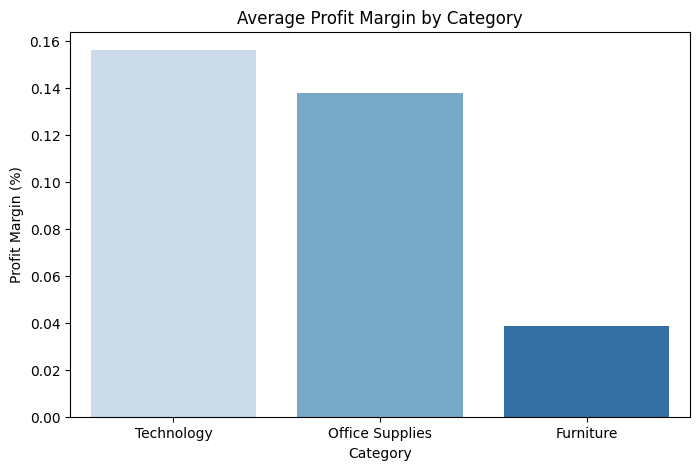

In [33]:
df["Profit Margin"] = df["Profit"] / df["Sales"]

margin_by_category = df.groupby("Category")["Profit Margin"].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=margin_by_category.index, y=margin_by_category.values, palette="Blues")
plt.title("Average Profit Margin by Category")
plt.ylabel("Profit Margin (%)")
plt.show()


**Scatter Plot: Discount vs Profit**

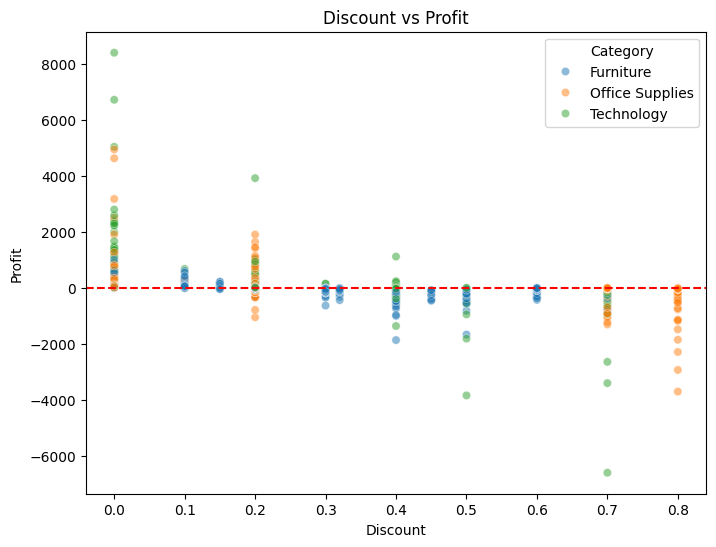

In [34]:


plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Discount", y="Profit", alpha=0.5, hue="Category")
plt.axhline(0, color="red", linestyle="--")
plt.title("Discount vs Profit")
plt.show()


**Average Sales & Profit by Discount Level**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\3256092423.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_summary = df.groupby("Discount_Bin")[["Sales","Profit"]].mean().reset_index()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\3256092423.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=discount_summary, x="Discount_Bin", y="Sales", palette="Blues")
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\3256092423.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=d

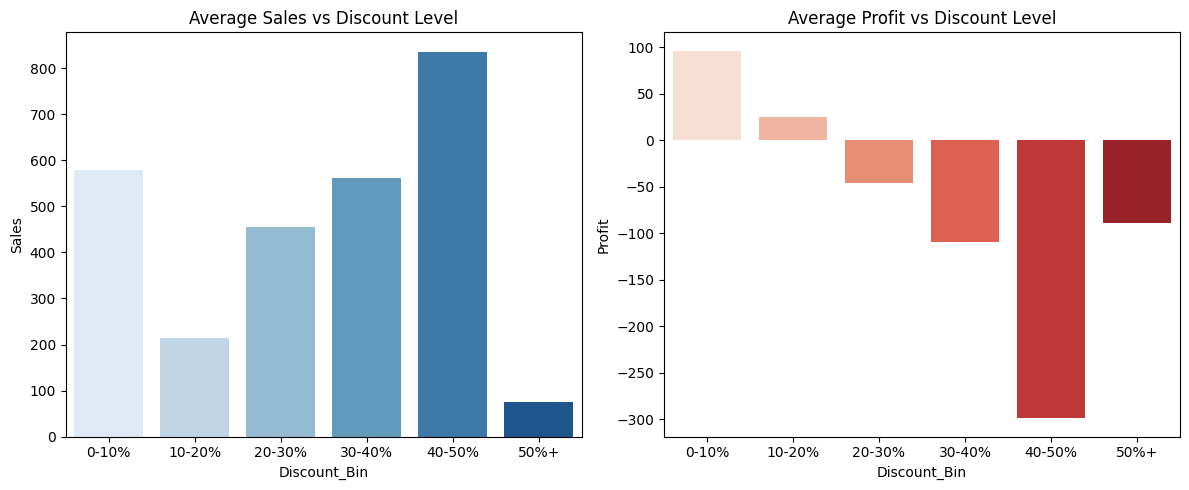

In [35]:
# Create discount bins
df['Discount_Bin'] = pd.cut(df['Discount'], bins=[0,0.1,0.2,0.3,0.4,0.5,1.0], labels=["0-10%","10-20%","20-30%","30-40%","40-50%","50%+"])

discount_summary = df.groupby("Discount_Bin")[["Sales","Profit"]].mean().reset_index()

plt.figure(figsize=(12,5))

# Sales
plt.subplot(1,2,1)
sns.barplot(data=discount_summary, x="Discount_Bin", y="Sales", palette="Blues")
plt.title("Average Sales vs Discount Level")

# Profit
plt.subplot(1,2,2)
sns.barplot(data=discount_summary, x="Discount_Bin", y="Profit", palette="Reds")
plt.title("Average Profit vs Discount Level")

plt.tight_layout()
plt.show()


**Profit Margin vs Discount**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\782944820.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Discount_Bin", y="Profit Margin", palette="coolwarm")


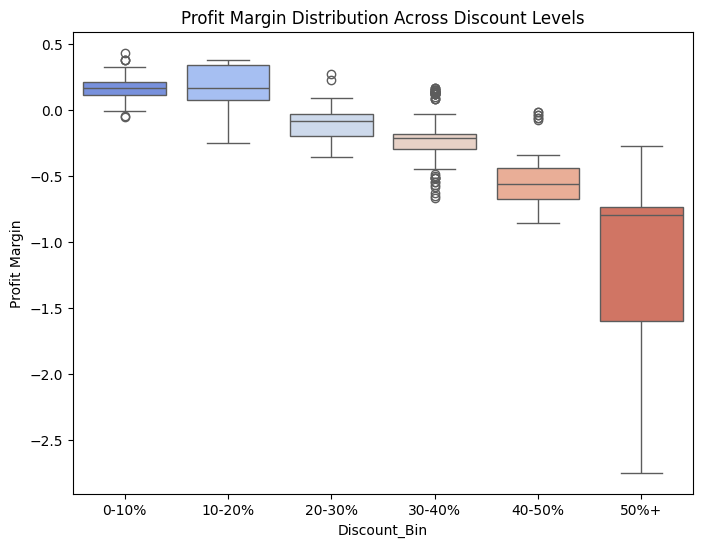

In [36]:
df["Profit Margin"] = df["Profit"] / df["Sales"]

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Discount_Bin", y="Profit Margin", palette="coolwarm")
plt.title("Profit Margin Distribution Across Discount Levels")
plt.ylabel("Profit Margin")
plt.show()


**Sub-Category Level Analysis**

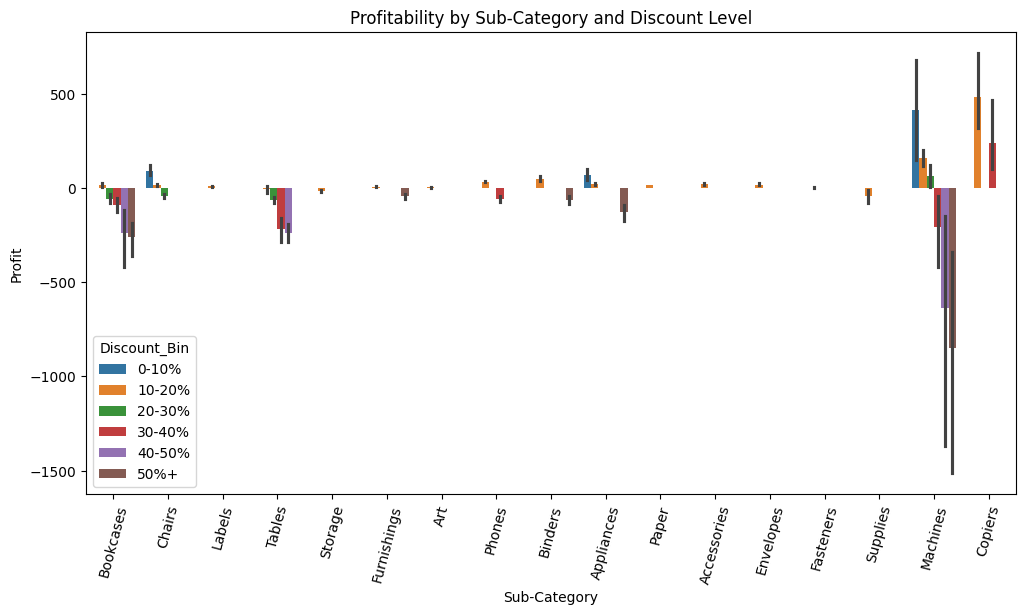

In [37]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="Sub-Category", y="Profit", hue="Discount_Bin", estimator="mean")
plt.title("Profitability by Sub-Category and Discount Level")
plt.xticks(rotation=75)
plt.show()


**Customer Segmentation**

which is super valuable for a business to identify loyal customers, high-value customers, and risky customers.

Prepare Data

In [38]:


# Ensure dates are in datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors="coerce")

# Today's date (max order date + 1 day for recency calculation)
today_date = df['Order Date'].max() + pd.Timedelta(days=1)


Build RFM Table

In [39]:
rfm = df.groupby("Customer ID").agg({
    "Order Date": lambda x: (today_date - x.max()).days,  # Recency
    "Order ID": "nunique",                               # Frequency
    "Sales": "sum"                                       # Monetary
}).reset_index()

rfm.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]


Scoring Customers

In [40]:
rfm["R_Score"] = pd.qcut(rfm["Recency"], 4, labels=[4,3,2,1])  # lower recency = better
rfm["F_Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 4, labels=[1,2,3,4])
rfm["M_Score"] = pd.qcut(rfm["Monetary"], 4, labels=[1,2,3,4])

# Combine into RFM Score
rfm["RFM_Score"] = rfm["R_Score"].astype(str) + rfm["F_Score"].astype(str) + rfm["M_Score"].astype(str)


Segment Customers

In [41]:
def segment(rfm_score):
    if rfm_score in ["444","443","434","344"]:
        return "Champions"
    elif rfm_score in ["333","334","323","233"]:
        return "Loyal Customers"
    elif rfm_score in ["111","112","121"]:
        return "Lost Customers"
    elif rfm_score in ["211","221","212"]:
        return "At Risk"
    else:
        return "Others"

rfm["Segment"] = rfm["RFM_Score"].apply(segment)


In [42]:
def segment(rfm_score):
    if rfm_score in ["444","443","434","344"]:
        return "Champions"
    elif rfm_score in ["333","334","323","233"]:
        return "Loyal Customers"
    elif rfm_score in ["111","112","121"]:
        return "Lost Customers"
    elif rfm_score in ["211","221","212"]:
        return "At Risk"
    else:
        return "Others"

rfm["Segment"] = rfm["RFM_Score"].apply(segment)


Visualize Segments

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\3129126056.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x="Segment", order=rfm["Segment"].value_counts().index, palette="Set2")


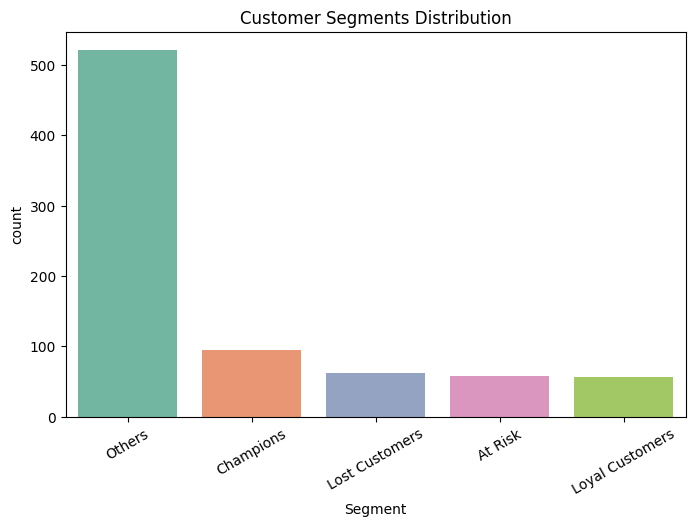

In [43]:

plt.figure(figsize=(8,5))
sns.countplot(data=rfm, x="Segment", order=rfm["Segment"].value_counts().index, palette="Set2")
plt.title("Customer Segments Distribution")
plt.xticks(rotation=30)
plt.show()


High-Value Customers

In [44]:
top_customers = rfm.sort_values("Monetary", ascending=False).head(10)
print(top_customers[["CustomerID","Recency","Frequency","Monetary","Segment"]])


    CustomerID  Recency  Frequency   Monetary    Segment
700   SM-20320    156.0          5  25043.050     Others
741   TC-20980    436.0          5  19052.218     Others
621   RB-19360    620.0          6  15117.339     Others
730   TA-21385    252.0          4  14595.620     Others
6     AB-10105    131.0         10  14473.571  Champions
434   KL-16645    247.0         12  14175.229     Others
669   SC-20095    765.0          9  14142.334     Others
327   HL-15040     70.0          6  12873.298     Others
683   SE-20110    460.0         11  12209.438     Others
131   CC-12370     36.0          5  12129.072     Others


# **Business insight**

Which products/categories are driving the most revenue (Sales)

**Sales by Category**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\2812508763.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_category.index, y=sales_by_category.values, palette="Blues")


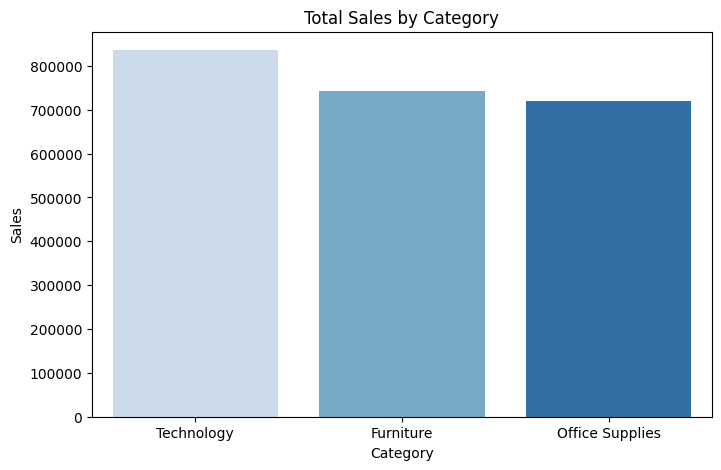

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sales_by_category = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values, palette="Blues")
plt.title("Total Sales by Category")
plt.ylabel("Sales")
plt.show()


**Sales by Sub-Category**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\1346960041.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_subcat.index, y=sales_by_subcat.values, palette="viridis")


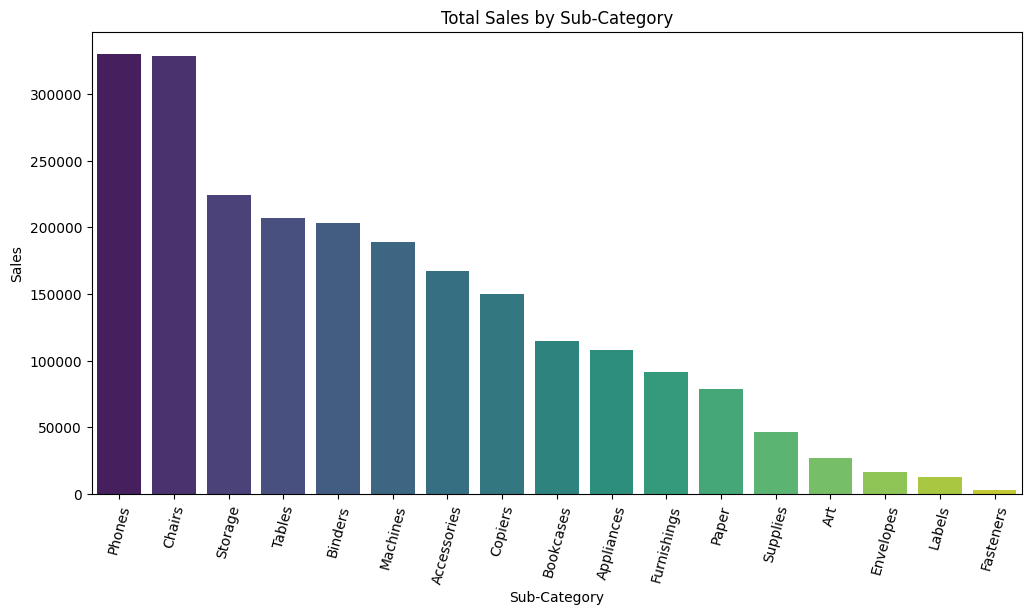

In [46]:
sales_by_subcat = df.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=sales_by_subcat.index, y=sales_by_subcat.values, palette="viridis")
plt.title("Total Sales by Sub-Category")
plt.ylabel("Sales")
plt.xticks(rotation=75)
plt.show()


**Top 10 Products by Sales**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\2103522818.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=sales_by_product.index, x=sales_by_product.values, palette="coolwarm")


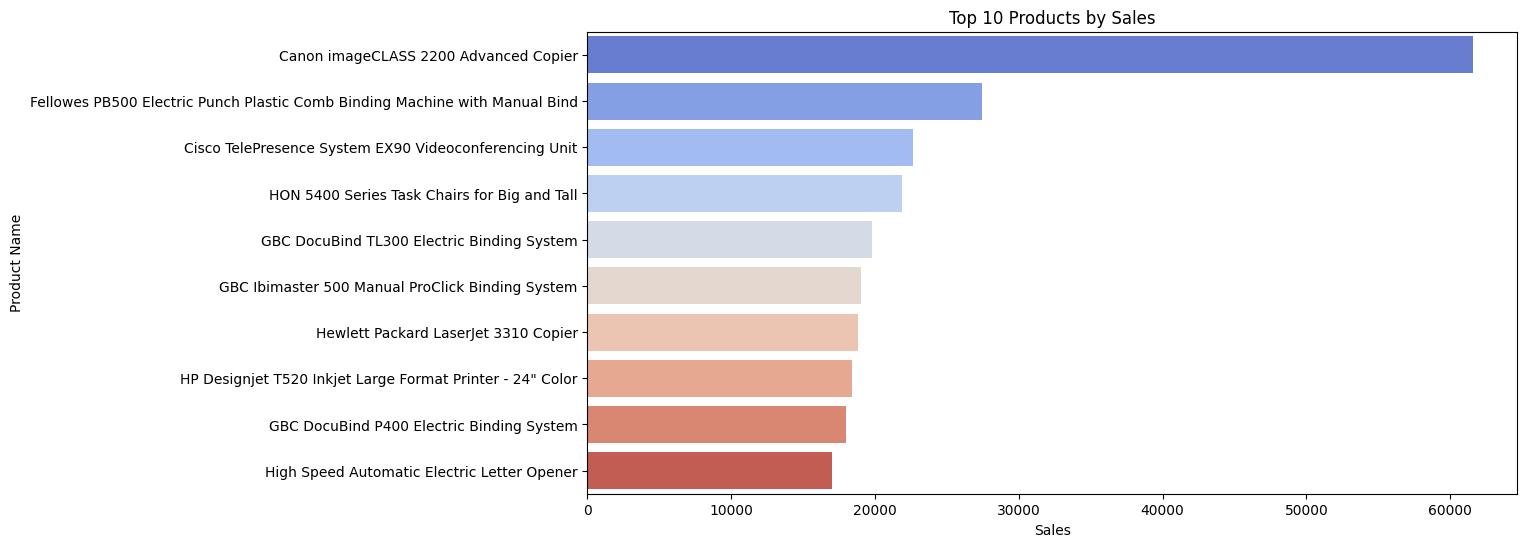

In [47]:
sales_by_product = df.groupby("Product Name")["Sales"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(y=sales_by_product.index, x=sales_by_product.values, palette="coolwarm")
plt.title("Top 10 Products by Sales")
plt.xlabel("Sales")
plt.show()


**Category Share in Total Sales (Pie Chart)**

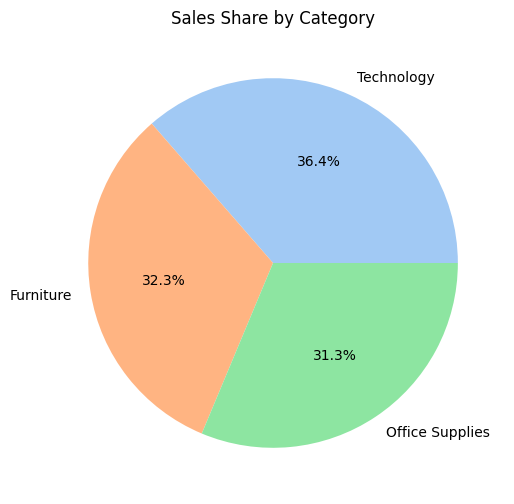

In [48]:
sales_by_category.plot(kind="pie", autopct="%1.1f%%", figsize=(6,6), colors=sns.color_palette("pastel"))
plt.title("Sales Share by Category")
plt.ylabel("")
plt.show()


**which products/categories drive the highest profit**

**Profit by Category**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\2934173313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_by_category.index, y=profit_by_category.values, palette="Greens")


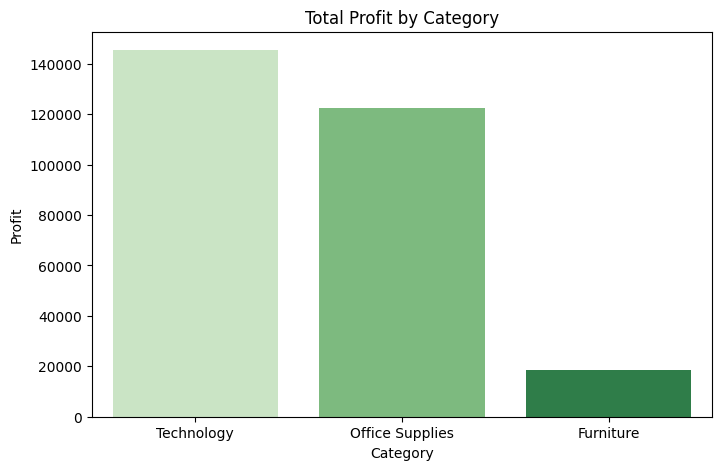

In [49]:
profit_by_category = df.groupby("Category")["Profit"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=profit_by_category.index, y=profit_by_category.values, palette="Greens")
plt.title("Total Profit by Category")
plt.ylabel("Profit")
plt.show()


**Profit by Sub-Category**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\2837206556.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_by_subcat.index, y=profit_by_subcat.values, palette="viridis")


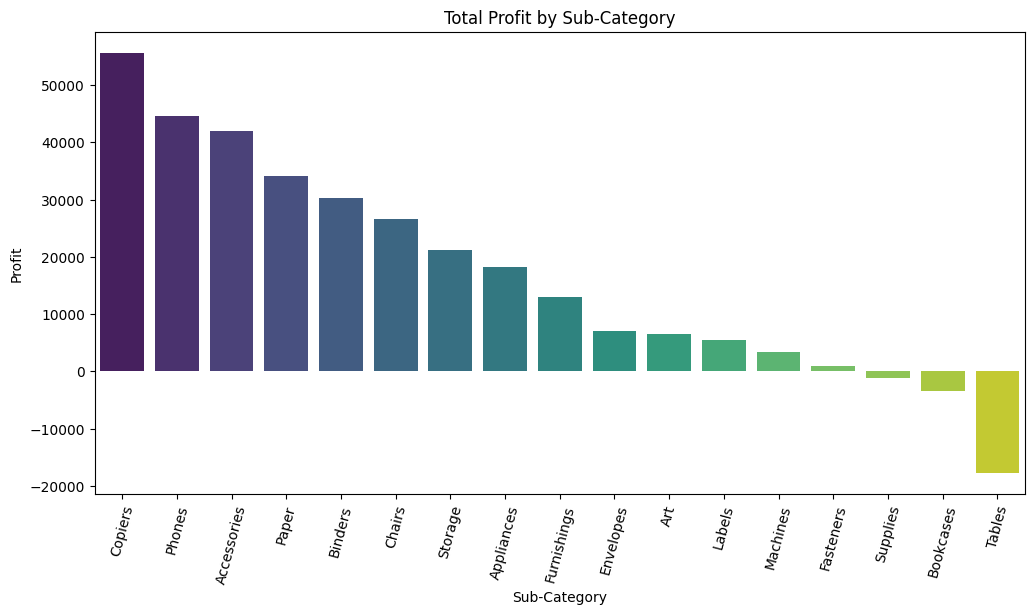

In [50]:
profit_by_subcat = df.groupby("Sub-Category")["Profit"].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=profit_by_subcat.index, y=profit_by_subcat.values, palette="viridis")
plt.title("Total Profit by Sub-Category")
plt.ylabel("Profit")
plt.xticks(rotation=75)
plt.show()


**Top 10 Most Profitable Products**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\1330938955.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_products_profit.index, x=top_products_profit.values, palette="Blues")


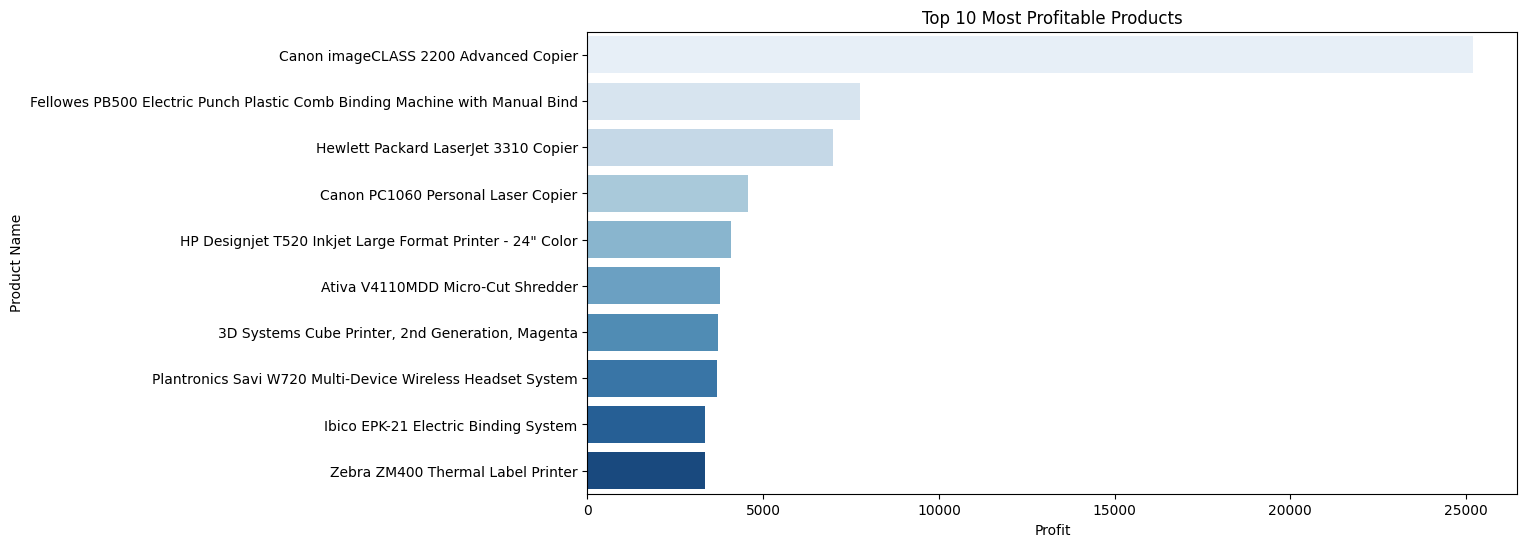

In [51]:
top_products_profit = df.groupby("Product Name")["Profit"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(y=top_products_profit.index, x=top_products_profit.values, palette="Blues")
plt.title("Top 10 Most Profitable Products")
plt.xlabel("Profit")
plt.show()


**Bottom 10 (Loss-Making) Product**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\1445670008.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=bottom_products_profit.index, x=bottom_products_profit.values, palette="Reds")


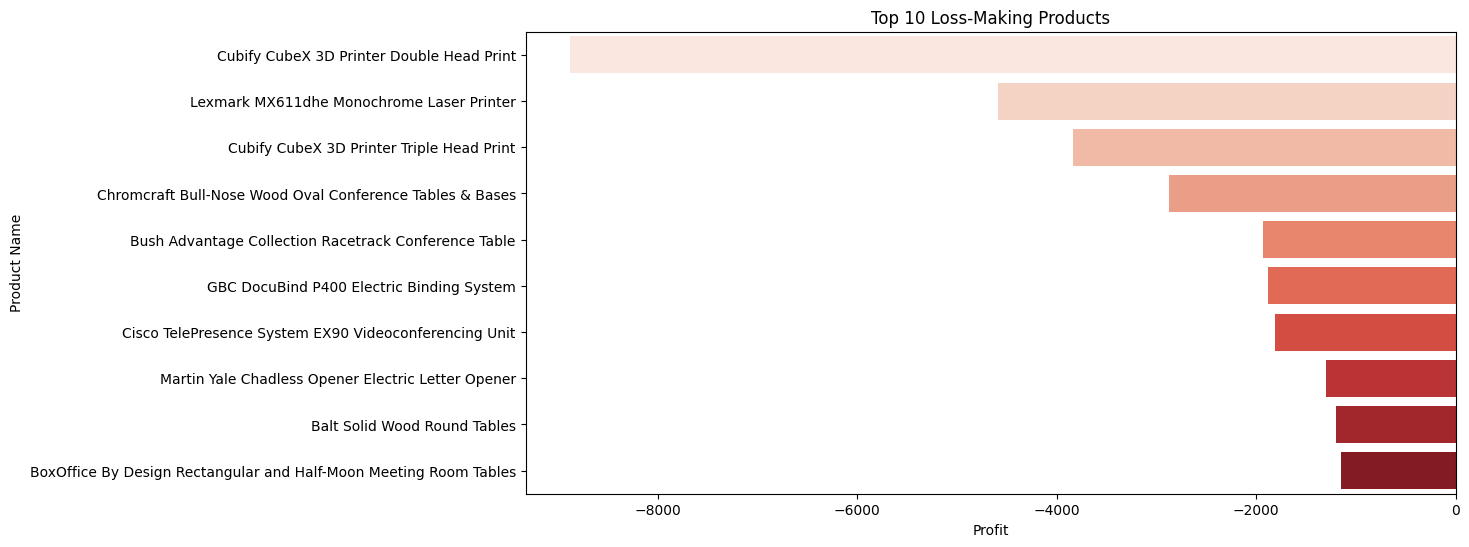

In [52]:
bottom_products_profit = df.groupby("Product Name")["Profit"].sum().sort_values().head(10)

plt.figure(figsize=(12,6))
sns.barplot(y=bottom_products_profit.index, x=bottom_products_profit.values, palette="Reds")
plt.title("Top 10 Loss-Making Products")
plt.xlabel("Profit")
plt.show()


**Profit Margin (Efficiency)**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\2935322012.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=margin_by_subcat.index, y=margin_by_subcat.values, palette="coolwarm")


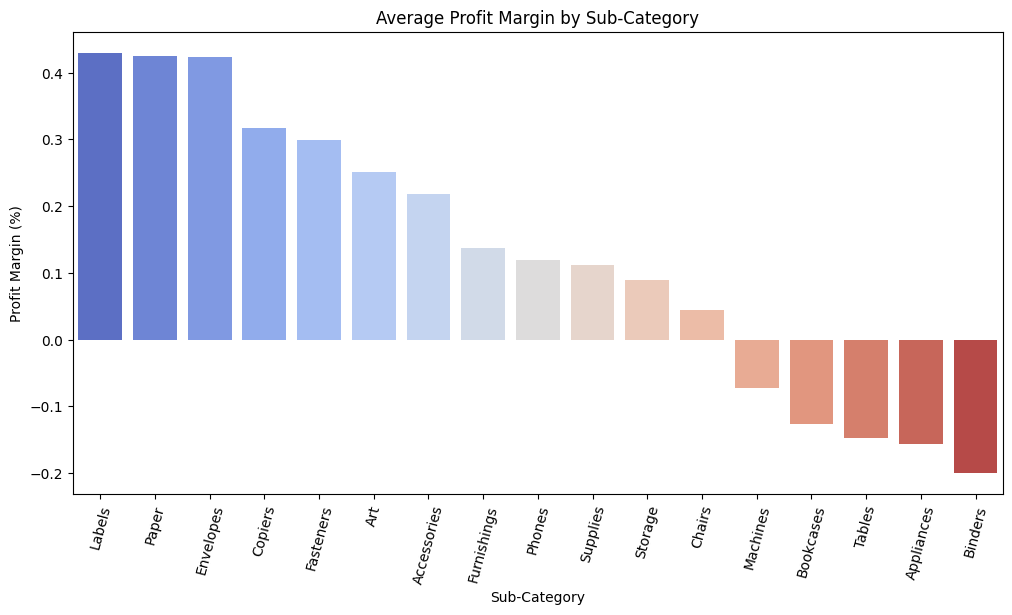

In [53]:
df["Profit Margin"] = df["Profit"] / df["Sales"]

margin_by_subcat = df.groupby("Sub-Category")["Profit Margin"].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=margin_by_subcat.index, y=margin_by_subcat.values, palette="coolwarm")
plt.title("Average Profit Margin by Sub-Category")
plt.ylabel("Profit Margin (%)")
plt.xticks(rotation=75)
plt.show()


**Which categories/sub-categories/products drive the highest profit**

**Profit by Category**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\2934173313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_by_category.index, y=profit_by_category.values, palette="Greens")


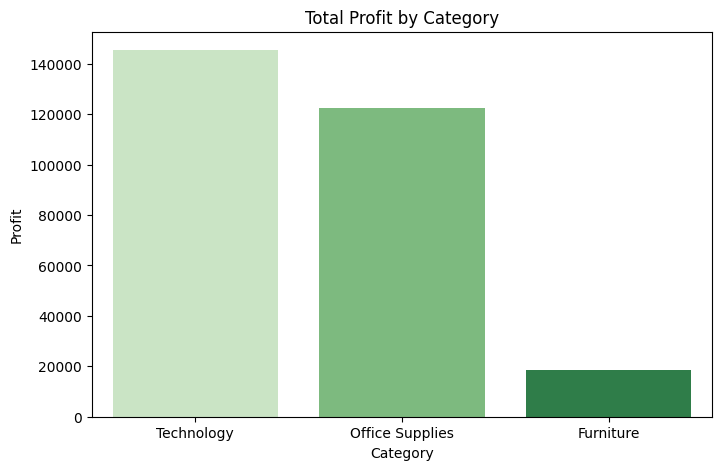

In [54]:
profit_by_category = df.groupby("Category")["Profit"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=profit_by_category.index, y=profit_by_category.values, palette="Greens")
plt.title("Total Profit by Category")
plt.ylabel("Profit")
plt.show()


**Profit by Sub-Category**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\2837206556.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_by_subcat.index, y=profit_by_subcat.values, palette="viridis")


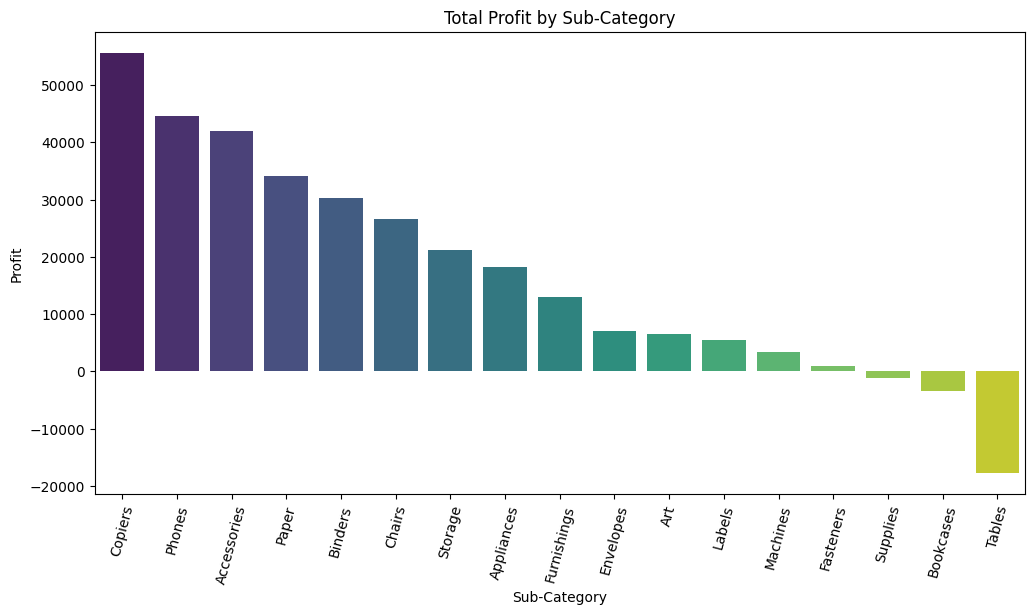

In [55]:
profit_by_subcat = df.groupby("Sub-Category")["Profit"].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=profit_by_subcat.index, y=profit_by_subcat.values, palette="viridis")
plt.title("Total Profit by Sub-Category")
plt.ylabel("Profit")
plt.xticks(rotation=75)
plt.show()


**Top 10 Most Profitable Products**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\1330938955.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_products_profit.index, x=top_products_profit.values, palette="Blues")


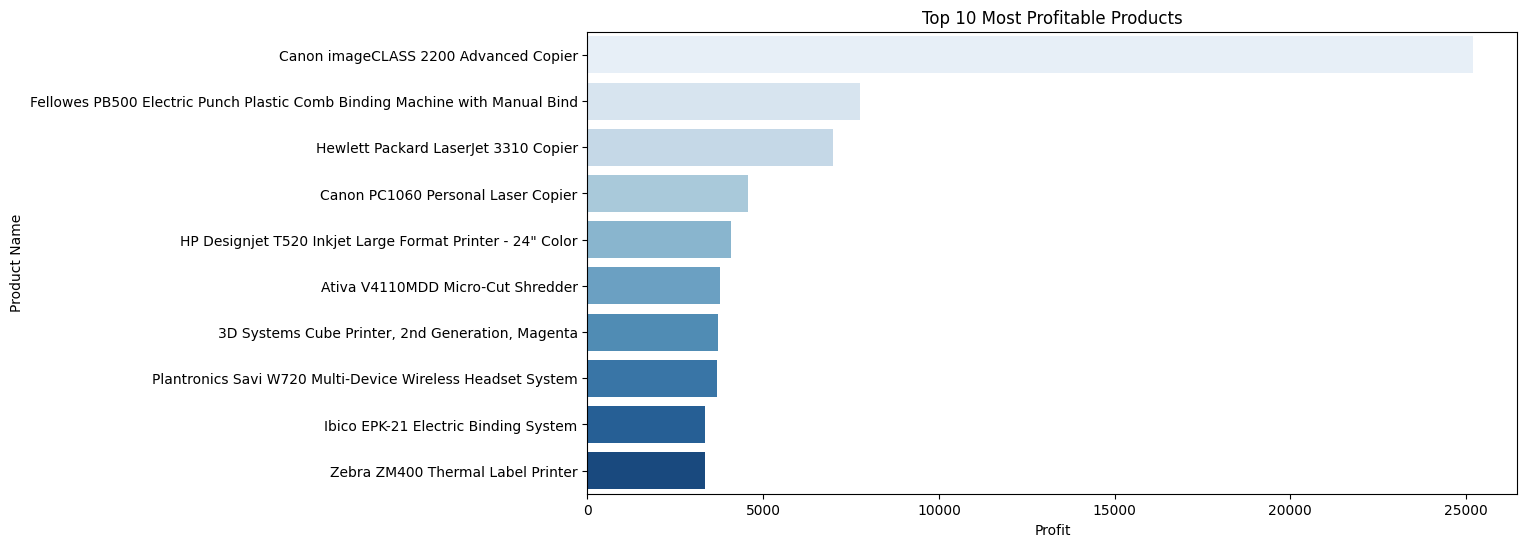

In [56]:
top_products_profit = df.groupby("Product Name")["Profit"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(y=top_products_profit.index, x=top_products_profit.values, palette="Blues")
plt.title("Top 10 Most Profitable Products")
plt.xlabel("Profit")
plt.show()


**Profit Margin (Efficiency Check)**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\2935322012.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=margin_by_subcat.index, y=margin_by_subcat.values, palette="coolwarm")


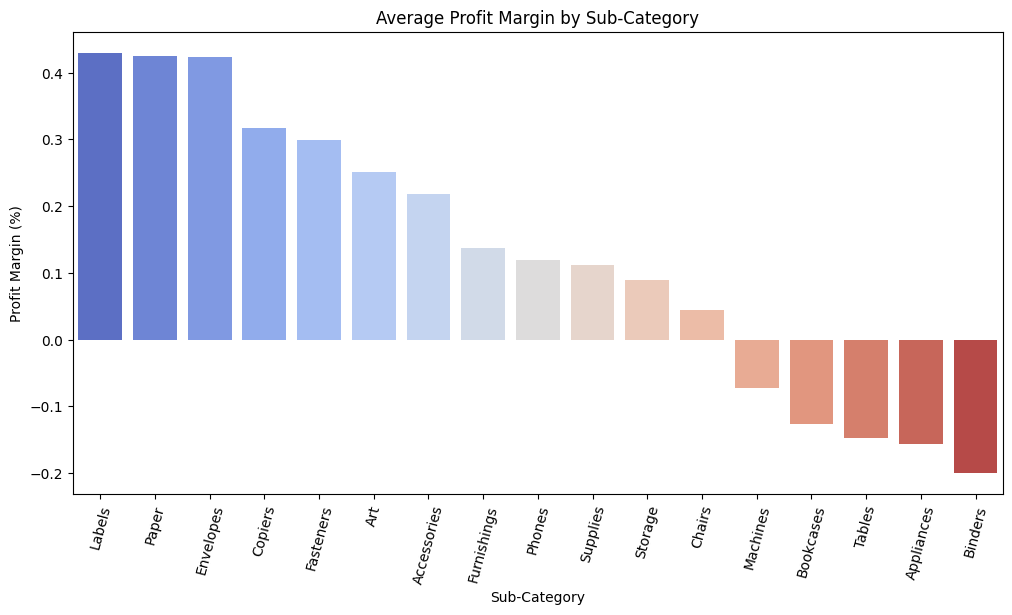

In [57]:
df["Profit Margin"] = df["Profit"] / df["Sales"]

margin_by_subcat = df.groupby("Sub-Category")["Profit Margin"].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=margin_by_subcat.index, y=margin_by_subcat.values, palette="coolwarm")
plt.title("Average Profit Margin by Sub-Category")
plt.ylabel("Profit Margin (%)")
plt.xticks(rotation=75)
plt.show()


# **Geography-based profitability**

**Profit by Region**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\1584095294.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_by_region.index, y=profit_by_region.values, palette="Greens")


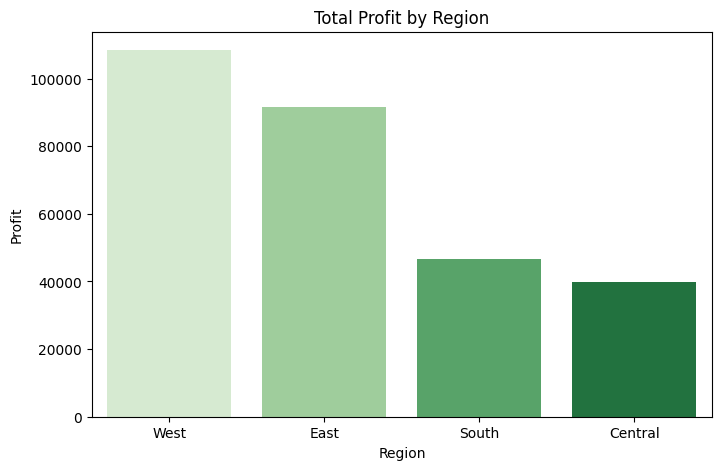

In [58]:
profit_by_region = df.groupby("Region")["Profit"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=profit_by_region.index, y=profit_by_region.values, palette="Greens")
plt.title("Total Profit by Region")
plt.ylabel("Profit")
plt.show()


**Profit by State (Top & Bottom)**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\61716070.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=profit_by_city.index, x=profit_by_city.values, palette="viridis")


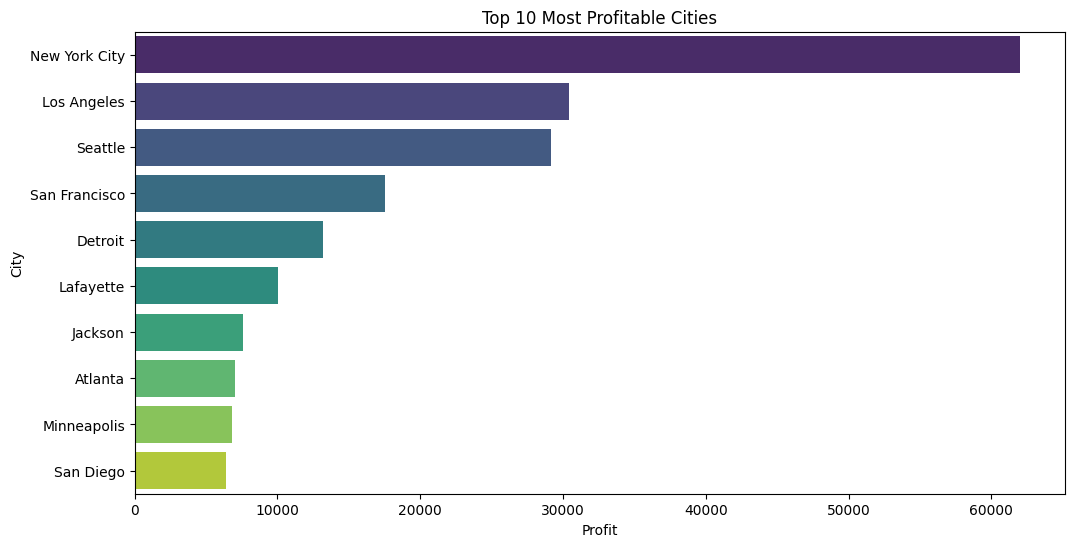

In [59]:
profit_by_city = df.groupby("City")["Profit"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(y=profit_by_city.index, x=profit_by_city.values, palette="viridis")
plt.title("Top 10 Most Profitable Cities")
plt.xlabel("Profit")
plt.show()


**Regional Profitability vs Sales (Efficiency Check)**

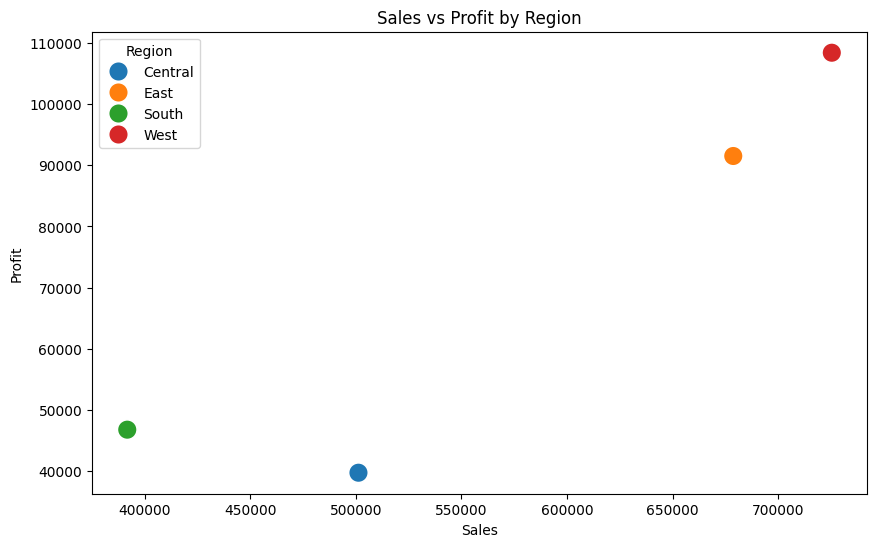

In [60]:
region_summary = df.groupby("Region")[["Sales","Profit"]].sum().reset_index()

plt.figure(figsize=(10,6))
sns.scatterplot(data=region_summary, x="Sales", y="Profit", hue="Region", s=200)
plt.title("Sales vs Profit by Region")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()


# **Do high discounts actually lead to losses?**

**Scatter Plot: Discount vs Profit**

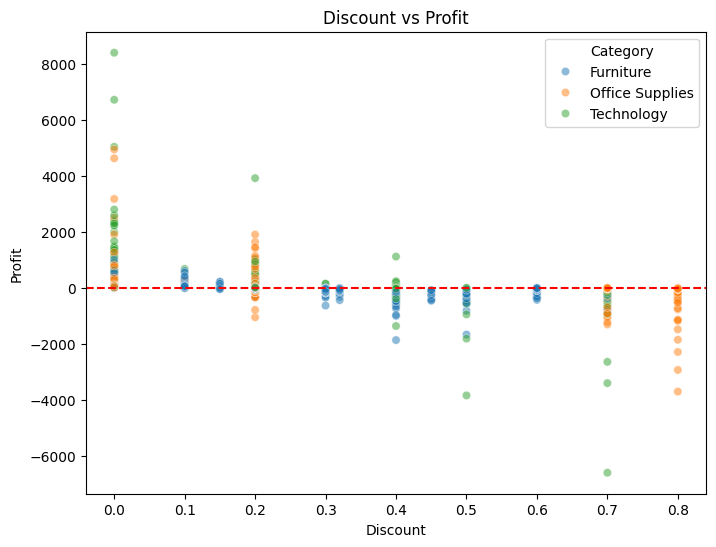

In [61]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Discount", y="Profit", alpha=0.5, hue="Category")
plt.axhline(0, color="red", linestyle="--")
plt.title("Discount vs Profit")
plt.show()


**Average Profit at Different Discount Levels**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\925266824.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_summary = df.groupby("Discount_Bin")[["Sales","Profit"]].mean().reset_index()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\925266824.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=discount_summary, x="Discount_Bin", y="Sales", palette="Blues")
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\925266824.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=disc

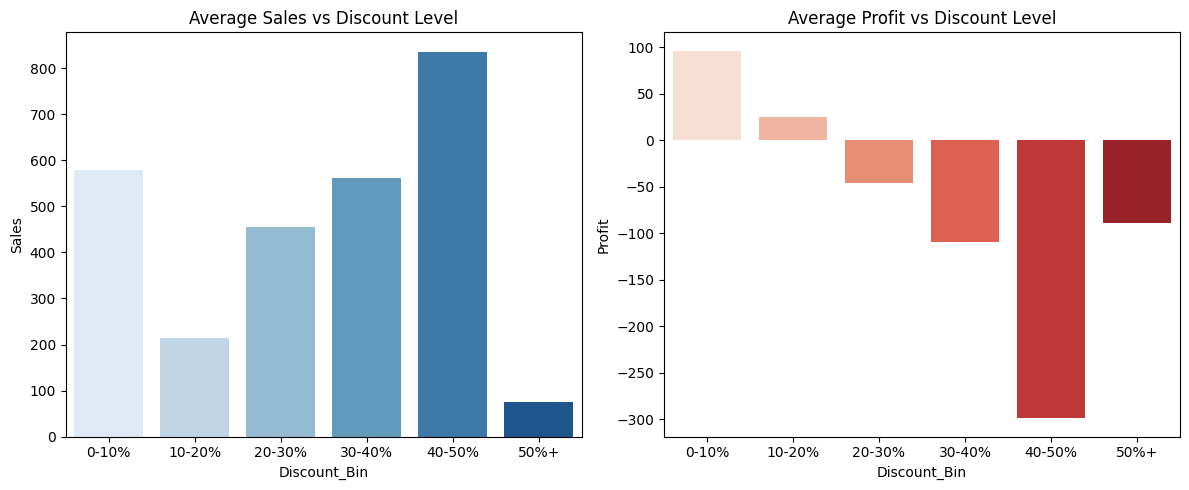

In [62]:
# Create discount bins
df['Discount_Bin'] = pd.cut(df['Discount'],
                            bins=[0,0.1,0.2,0.3,0.4,0.5,1.0],
                            labels=["0-10%","10-20%","20-30%","30-40%","40-50%","50%+"])

discount_summary = df.groupby("Discount_Bin")[["Sales","Profit"]].mean().reset_index()

plt.figure(figsize=(12,5))

# Sales vs Discount
plt.subplot(1,2,1)
sns.barplot(data=discount_summary, x="Discount_Bin", y="Sales", palette="Blues")
plt.title("Average Sales vs Discount Level")

# Profit vs Discount
plt.subplot(1,2,2)
sns.barplot(data=discount_summary, x="Discount_Bin", y="Profit", palette="Reds")
plt.title("Average Profit vs Discount Level")

plt.tight_layout()
plt.show()


**Profit Margin vs Discount**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\4206638996.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Discount_Bin", y="Profit Margin", palette="coolwarm")


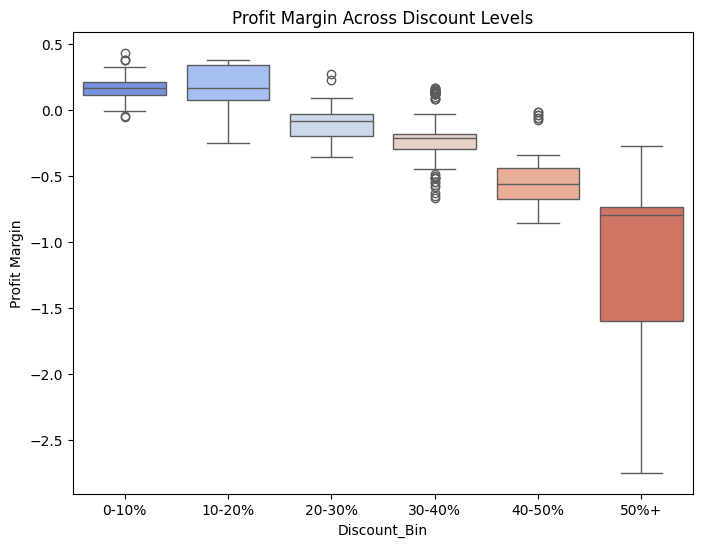

In [63]:
df["Profit Margin"] = df["Profit"] / df["Sales"]

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Discount_Bin", y="Profit Margin", palette="coolwarm")
plt.title("Profit Margin Across Discount Levels")
plt.ylabel("Profit Margin")
plt.show()


**Sub-Category Impact**

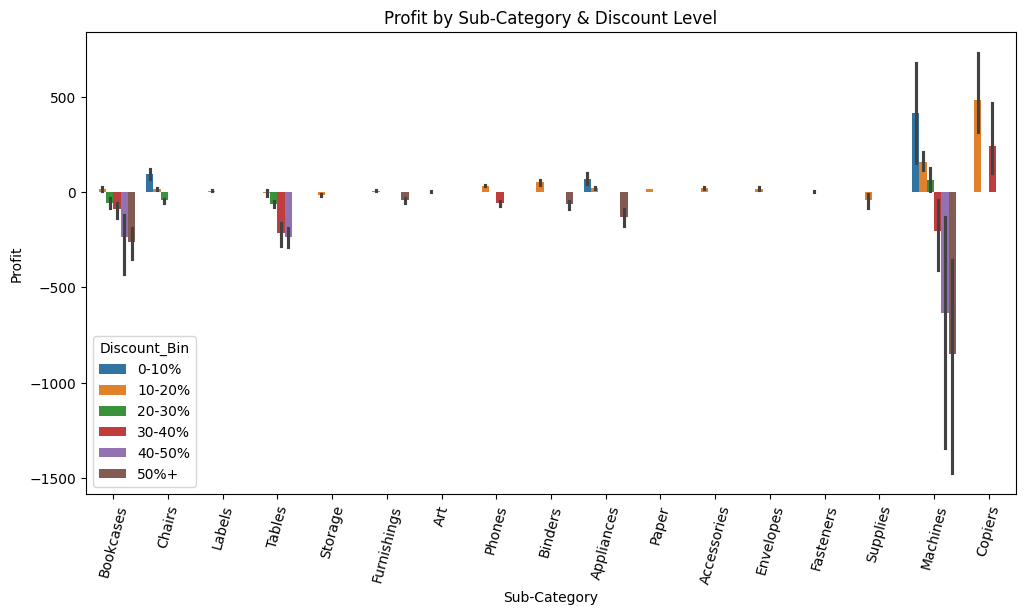

In [64]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="Sub-Category", y="Profit", hue="Discount_Bin", estimator="mean")
plt.title("Profit by Sub-Category & Discount Level")
plt.xticks(rotation=75)
plt.show()


## **Who are the top customers by revenue & profit?**

**Top Customers by Sales (Revenue)**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\4256896570.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_customers_sales.index, x=top_customers_sales.values, palette="Blues")


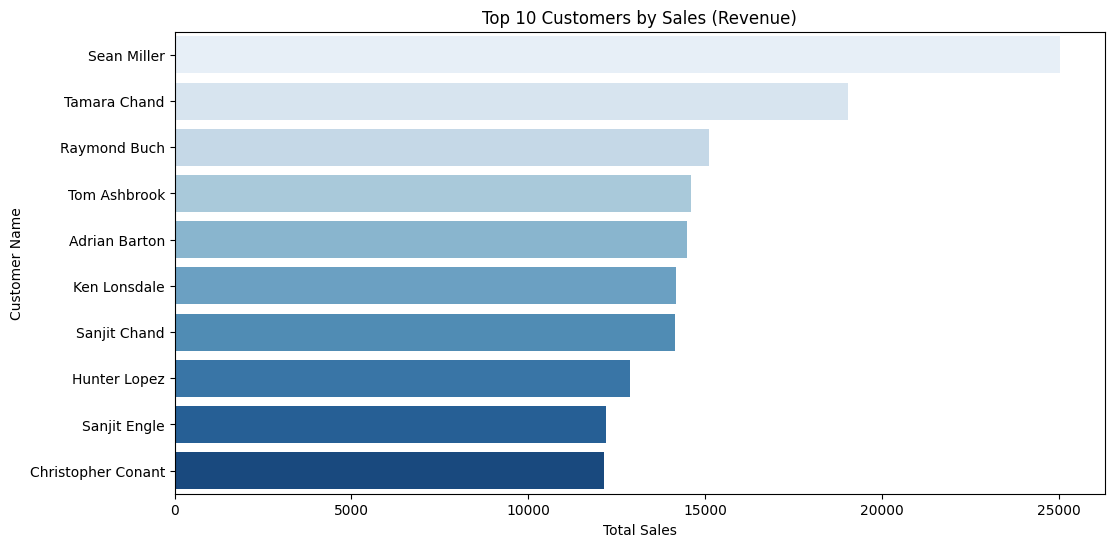

In [65]:
top_customers_sales = df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(y=top_customers_sales.index, x=top_customers_sales.values, palette="Blues")
plt.title("Top 10 Customers by Sales (Revenue)")
plt.xlabel("Total Sales")
plt.show()


**Top Customers by Profit**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\2447136544.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_customers_profit.index, x=top_customers_profit.values, palette="Greens")


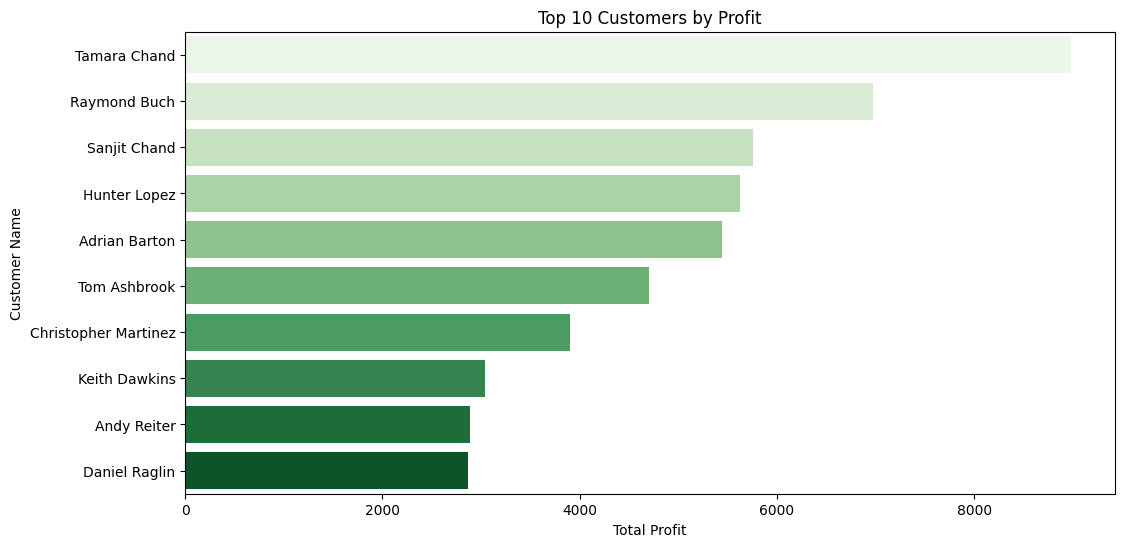

In [66]:
top_customers_profit = df.groupby("Customer Name")["Profit"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(y=top_customers_profit.index, x=top_customers_profit.values, palette="Greens")
plt.title("Top 10 Customers by Profit")
plt.xlabel("Total Profit")
plt.show()


**Top Loss-Making Customers**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12452\1018339819.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=loss_customers.index, x=loss_customers.values, palette="Reds")


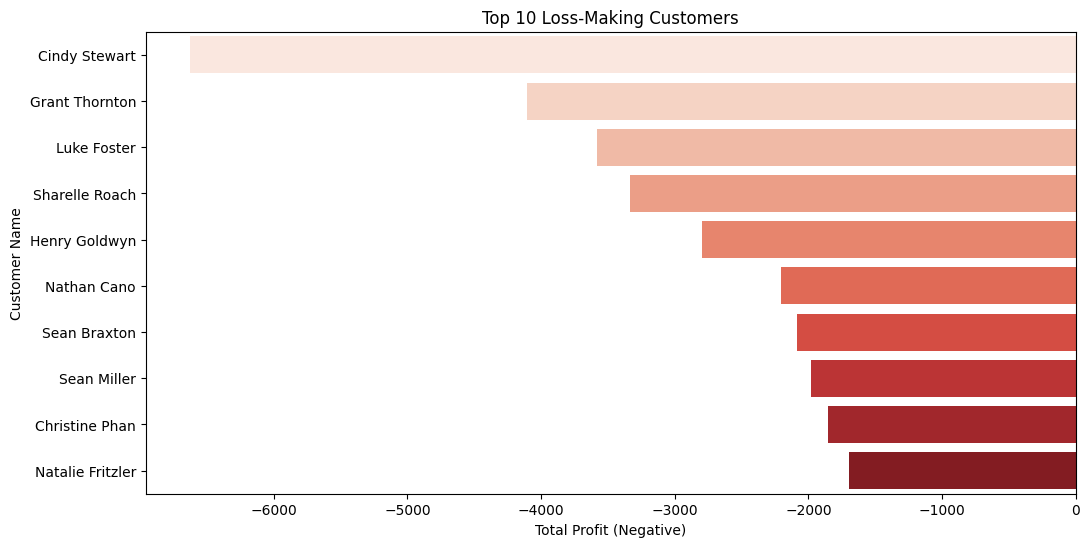

In [67]:
loss_customers = df.groupby("Customer Name")["Profit"].sum().sort_values().head(10)

plt.figure(figsize=(12,6))
sns.barplot(y=loss_customers.index, x=loss_customers.values, palette="Reds")
plt.title("Top 10 Loss-Making Customers")
plt.xlabel("Total Profit (Negative)")
plt.show()


**Combined Sales vs Profit (Scatter Plot)**

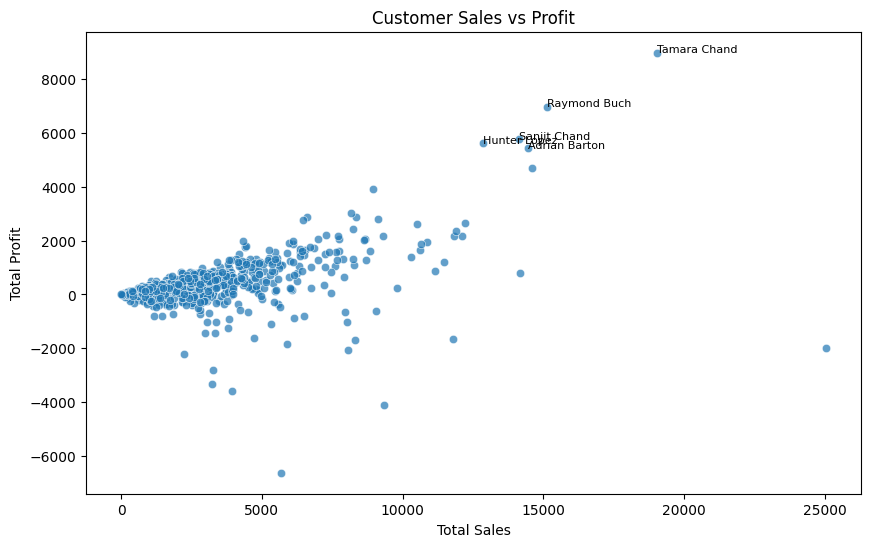

In [68]:
customer_summary = df.groupby("Customer Name")[["Sales","Profit"]].sum().reset_index()

plt.figure(figsize=(10,6))
sns.scatterplot(data=customer_summary, x="Sales", y="Profit", alpha=0.7)
plt.title("Customer Sales vs Profit")
plt.xlabel("Total Sales")
plt.ylabel("Total Profit")

# Highlight top performers
for i in customer_summary.nlargest(5, "Profit").itertuples():
    plt.text(i.Sales, i.Profit, i._1, fontsize=8)

plt.show()


### 	**Dashboard Building**







**1: Install Plotly**

In [69]:
!pip install plotly


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


**2: Import & Use Plotly**

In [70]:
# Calculate KPIs
total_sales = df["Sales"].sum()
total_profit = df["Profit"].sum()
avg_discount = df["Discount"].mean()
profit_margin = (df["Profit"].sum() / df["Sales"].sum()) * 100

print("✅ KPIs Calculated:")
print("Total Sales:", total_sales)
print("Total Profit:", total_profit)
print("Average Discount:", avg_discount)
print("Profit Margin (%):", profit_margin)


✅ KPIs Calculated:
Total Sales: 2297200.8603000003
Total Profit: 286397.0217
Average Discount: 0.15620272163297977
Profit Margin (%): 12.467217240315604


In [73]:
!pip install dash==2.17.0 jupyter-dash plotly


Defaulting to user installation because normal site-packages is not writeable
  Using cached dash-2.17.0-py3-none-any.whl.metadata (10 kB)
Using cached dash-2.17.0-py3-none-any.whl (7.5 MB)
  Attempting uninstall: dash
    Found existing installation: dash 3.2.0
    Uninstalling dash-3.2.0:
      Successfully uninstalled dash-3.2.0



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [75]:
import dash
import jupyter_dash
import plotly
print("Dash:", dash.__version__)
print("JupyterDash:", jupyter_dash.__version__)
print("Plotly:", plotly.__version__)


Dash: 2.17.0
JupyterDash: 0.4.2
Plotly: 6.3.0


In [86]:
# ==========================================
# 📊 Superstore Interactive Dashboard (Dash)
# ==========================================

# Install dependencies if needed
!pip install dash jupyter-dash plotly --quiet

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, dcc, html
from dash import Dash

# ------------------------------
# 1. Load Data
# ------------------------------
# Replace with your dataset path
# Example: df = pd.read_csv("Superstore.csv")
df = pd.read_csv("Superstore.csv",encoding="latin1")

# Convert date
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')

# ------------------------------
# 2. Compute KPIs
# ------------------------------
total_sales = df["Sales"].sum()
total_profit = df["Profit"].sum()
avg_discount = df["Discount"].mean() * 100
profit_margin = (df["Profit"].sum() / df["Sales"].sum()) * 100

# ------------------------------
# 3. Build Charts
# ------------------------------

# Sales by Category
fig_sales_cat = px.bar(df.groupby("Category")["Sales"].sum().reset_index(),
                       x="Category", y="Sales", color="Category",
                       title="💰 Sales by Category", text_auto=".2s")

# Profit by Region
fig_profit_region = px.bar(df.groupby("Region")["Profit"].sum().reset_index(),
                           x="Region", y="Profit", color="Region",
                           title="📈 Profit by Region", text_auto=".2s")

# Discount vs Profit
fig_discount_profit = px.scatter(df, x="Discount", y="Profit",
                                 color="Category", size="Sales",
                                 hover_data=["Sub-Category", "Product Name"],
                                 title="💸 Discount vs Profit (Bubble = Sales)")
fig_discount_profit.add_hline(y=0, line_dash="dash", line_color="red")

# ------------------------------
# 4. Dash App Layout
# ------------------------------
app = Dash(__name__, title="Superstore Dashboard")


app.layout = html.Div(style={"fontFamily": "Arial", "backgroundColor": "#111111", "color": "white", "padding": "20px"}, children=[

    html.H1("📊 Superstore Dashboard", style={"textAlign": "center", "color": "#00CC96"}),

    # KPI Cards
    html.Div(style={"display": "flex", "justifyContent": "space-around", "marginBottom": "30px"}, children=[
        html.Div([
            html.H3("Total Sales", style={"textAlign": "center"}),
            html.H2(f"${total_sales:,.0f}", style={"textAlign": "center", "color": "#1f77b4"})
        ], style={"backgroundColor": "#222", "padding": "20px", "borderRadius": "10px", "width": "20%"}),

        html.Div([
            html.H3("Total Profit", style={"textAlign": "center"}),
            html.H2(f"${total_profit:,.0f}", style={"textAlign": "center", "color": "#2ca02c"})
        ], style={"backgroundColor": "#222", "padding": "20px", "borderRadius": "10px", "width": "20%"}),

        html.Div([
            html.H3("Avg. Discount", style={"textAlign": "center"}),
            html.H2(f"{avg_discount:.2f}%", style={"textAlign": "center", "color": "#ff7f0e"})
        ], style={"backgroundColor": "#222", "padding": "20px", "borderRadius": "10px", "width": "20%"}),

        html.Div([
            html.H3("Profit Margin", style={"textAlign": "center"}),
            html.H2(f"{profit_margin:.2f}%", style={"textAlign": "center", "color": "#d62728"})
        ], style={"backgroundColor": "#222", "padding": "20px", "borderRadius": "10px", "width": "20%"}),
    ]),

    # Charts
    html.Div([
        dcc.Graph(figure=fig_sales_cat, style={"marginBottom": "40px"}),
        dcc.Graph(figure=fig_profit_region, style={"marginBottom": "40px"}),
        dcc.Graph(figure=fig_discount_profit, style={"marginBottom": "40px"}),
    ]),

    # Insights
    html.Div([
        html.H2("🔎 Actionable Insights", style={"color": "#00CC96"}),
        html.Ul([
            html.Li("Furniture has high sales but often low/negative profit → review pricing & discount strategy."),
            html.Li("Technology is the most profitable category → focus marketing & expansion here."),
            html.Li("Central region underperforms in profit → optimize shipping or pricing."),
            html.Li("High discounts (>20%) usually lead to losses → tighten discount policy."),
            html.Li("A few top customers contribute most profit → invest in loyalty & retention."),
        ], style={"fontSize": "18px"})
    ])
])

# ------------------------------
# 5. Run the App in Colab
# ------------------------------
# ------------------------------
# 5. Run the App (open in browser)
# ------------------------------
# app.run_server(debug=True, port=8050)


# Function to open in a NEW tab
import webbrowser
import threading

def open_browser():
    # Force open a brand-new tab
    webbrowser.open_new("http://127.0.0.1:8050/")

if __name__ == "__main__":
    threading.Timer(1, open_browser).start()
    # Use "open_browser=False" to stop Dash from opening its own tab
    app.run_server(debug=True, port=8050, open_browser=False)






[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
